<div style="display: flex; background-color: purple;" >
<h1 style="margin: auto; padding: 30px; color: white; "> ANALYSE DES TENDANCES DU MARCHÉ DU JEU VIDÉO SUR FICHIER CONSOLIDÉ | UOI Games </h1>
</div>

## Jeu de données

**Nous allons travailler sur les fichiers suivants préalablement nettoyés (voir dossier '1.Nettoyage et transfo des fichiers') :**

* **tous_jeux_video_avec_notes_joueurs_clean.csv**
* **vente_jeu_video_clean.csv**
* **vente_de_console_2022_clean.csv**

Ces trois fichiers sont des copies renommées de *tous_jeux_video_avec_notes_joueurs_transfo.csv*, *vente_jeu_video_transfo.csv* et *vente_de_console_2022_transfo.csv*.

## Objectif
Ma mission consiste à **identifier les tendances, les comportements des clients et d'autres insights pertinents** permettant de renseigner UOI Games sur la stratégie de lancement d'un jeu vidéo triple A.

# SOMMAIRE <a class="anchor" id="sommaire"></a>

## Table des matières

* [A. Consolidation des fichiers historiques nettoyés fournies par UOI Games](#Consolidation)
    * [1. Chargement des deux premiers fichiers](#Chargement1)
    * [2. Jonction 1](#jonction1) 
        * [2.1. Jonction des DataFrames 'liste_des_jeux_et_notes' avec 'vente_jeu_video'](#jonction1.1)
        * [2.2. Traitement des manquants dans merged1](#manquants_merged1)
        * [2.3. Vérification type de données](#verif_merged1)
        * [2.4. Recherche et traitement des doublons dans merged1](#doublons_merged1)
    * [3. Jonction 2](#jonction2) 
       * [3.1. Chargement du fichier "vente_de_console_2022_15-01-2025_copie.csv"](#chargement2)
       * [3.2. Jonction des fichiers 'merged1' avec 'vente_de_console_2022'](#jonction2.1)
       * [3.3. Traitement des manquants dans merged2](#manquants_merged2)
       * [3.4. Recherche et traitement des doublons dans merged2](#doublons_merged2)
* [B. Jeu de données consolidé](#jeu_donnees_final)
* [C. Exploration et analyse](#exploration)
    * [1. Les jeux ](#jeux) 
        * [1.1. Nombre de références de jeux vidéo sortis de 2000 à 2020 (soit en 20 ans)](#Nb_jeux_periode)
        * [1.2. Distribution du nombre de jeux vidéo sortis dans le temps](#distrib_temps)
        * [1.3. Nombre de jeux vidéo par catégorie Esrb](#jeux_categ_esrb)
    * [2. Les ventes](#Ventes) 
       * [2.1. Nombre de reférences de jeux vidéo vendus à plus de 100000 exemplaires sur 40 ans](#nb_jeux_vendussup100k)
       * [2.2. Ventes mondiales moyennes des jeux vendus à plus de 100000 exemplaires](#vente_moy)
       * [2.3. Ventes totales sur la période des jeux vidéo vendus à plus de 100000 exemplaires dans le monde](#vente_totale_20ans)
       * [2.4. Comparaison des jeux portables vs non portables](#portablevsnonportable)
    * [3. Les ventes par segment](#vente_segment) 
       * [3.1. Analyse des ventes par région du monde](#anal_region)
       * [3.2. Calcul des ventes par genre et par région](#calcul_vente_genre_region)
           * [3.2.1. Treemap des ventes régionales par genre](#Treemap_genre_region)
       * [3.3. Analyse des genres les plus populaires](#anal_genre_popu)
       * [3.4. BoxPlots des ventes totales par genre](#boxplot_genre)
       * [3.5. Analyse des éditeurs (Publishers) les plus performants](#anal_editeur)
       * [3.6. Analyse des constructeurs les plus performants](#anal_construct)
       * [3.7. Heatmap des ventes de jeux par genre et par console](#heatmap_console_region)
       * [3.8. Analyse des genres les plus populaires](#anal_genre_popu)
       * [3.9. Évolution des ventes au fil des ans](#anal_genre_popu)
       * [3.10. Analyse des performances par plateforme](#anal_console)
       * [3.11. Heatmap des ventes de jeux par Console et par région](#heatmap_console_region)
       * [3.12. Part de marché par constructeur](#part_marche_constr)
    * [4. Statistiques des notes](#stat_note)
    * 
       * [4.1. Notes moyennes des jeux par genre](#note_moy_genre)
       * [4.2. Notes des jeux sur console](#note_moy_consol)
       * [4.3. Notes des jeux par constructeur](#note_moy_constr)
       * [4.4. Moyenne des notes par catégorie](#note_moy_esrb)
       * [4.5. Impact des notes moyennes sur les ventes](#impact_note)
    * [5. Analyses temporelles](#analyse_tempo) 
       * [5.1. Distribution des dates de sortie de consoles](#distrib_date_sortie)
       * [5.2. Historique des ventes de consoles (1977-2020)](#histo_vente_consol)
    * [6. Analyse des hits cachés](#hits_caches) 
    * [7. Comparaison des ventes de consoles avec les ventes de jeux](#comparaison_console_vente_jeu) 
    * [8. Analyse de corrélation](#correlation) 
       * [8.1. Matrice de correlation Pearson](#Matrice_Pearson)
       * [8.2. Matrice de correlation Spearman](#Matrice_Spearman)


-----------------------------------------------------------------------------------------

<a class="anchor" id="Consolidation"></a>
<div style="display: flex; background-color: cyan;" >
<h1 style="margin: auto; padding: 15px; "> A. Consolidation des fichiers historiques nettoyés fournies par UOI Games </h1>
</div>

In [7]:
# Importation des bibliothèques
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [8]:
# La ligne qui suit sert à afficher toutes les colonnes des dataframes jusqu'à 999.
pd.options.display.max_columns=999

# Chargement des deux premiers fichiers <a class="anchor" id="Chargement1"></a>


In [10]:
# Fichier 1 : 'tous_jeux_video_avec_notes_joueurs_clean.csv'
liste_des_jeux_et_notes = pd.read_csv('tous_jeux_video_avec_notes_joueurs_clean.csv', sep=',',encoding='utf_8', low_memory=False)

In [11]:
liste_des_jeux_et_notes.head(3)

Name  Year  Rating  Rating_top  Ratings_count  \
0        D/Generation HD  2015     0.0         0.0            2.0   
1  G Prime Into The Rain  2016     0.0         0.0            3.0   
2           Land Sliders  2015     0.0         0.0            2.0   

            Developers   Esrb_rating  
0  West Coast Software  Everyone 10+  
1           Soma Games      Everyone  
2      Prettygreat Pty  Everyone 10+

In [12]:
liste_des_jeux_et_notes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440874 entries, 0 to 440873
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Name           440874 non-null  object 
 1   Year           440874 non-null  int64  
 2   Rating         440811 non-null  float64
 3   Rating_top     440811 non-null  float64
 4   Ratings_count  440811 non-null  float64
 5   Developers     440874 non-null  object 
 6   Esrb_rating    440874 non-null  object 
dtypes: float64(3), int64(1), object(3)
memory usage: 23.5+ MB


In [13]:
liste_des_jeux_et_notes.describe(include='all')

Name           Year         Rating     Rating_top  \
count            440874  440874.000000  440811.000000  440811.000000   
unique           440874            NaN            NaN            NaN   
top     D/Generation HD            NaN            NaN            NaN   
freq                  1            NaN            NaN            NaN   
mean                NaN    2017.416770       0.078209       0.089630   
std                 NaN       3.075443       0.517087       0.580501   
min                 NaN    2000.000000       0.000000       0.000000   
25%                 NaN    2016.000000       0.000000       0.000000   
50%                 NaN    2018.000000       0.000000       0.000000   
75%                 NaN    2020.000000       0.000000       0.000000   
max                 NaN    2020.000000       4.860000       5.000000   

        Ratings_count Developers Esrb_rating  
count   440811.000000     440874      440874  
unique            NaN     202638           7  
top               NaN    Inconnu     Inconnu  
freq              NaN       4654      388095  
mean         2.135666        NaN         NaN  
std         37.496897        NaN         NaN  
min          0.000000        NaN         NaN  
25%          0.000000        NaN         NaN  
50%          0.000000        NaN         NaN  
75%          0.000000        NaN         NaN  
max       4289.000000        NaN         NaN

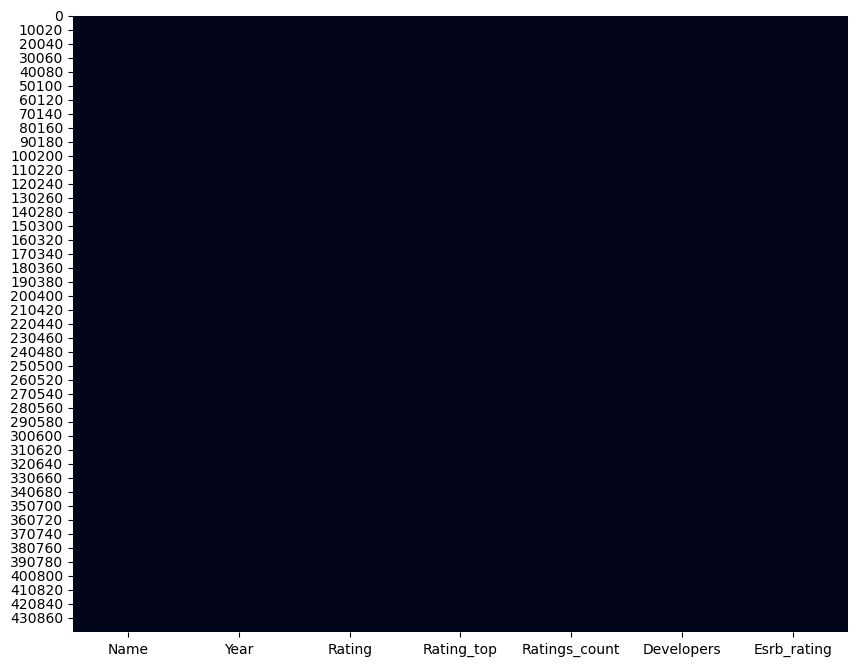

In [14]:
# Représentation visuelle des valeurs manquantes du DataSet
plt.figure(figsize=(10,8))
sns.heatmap(liste_des_jeux_et_notes.isna(),cbar=False); 

**=> Fichier OK**

In [16]:
# Fichier 2 : 'vente_jeu_video_clean.csv'
vente_jeu_video = pd.read_csv('vente_jeu_video_clean.csv', sep=',',encoding='utf_8', low_memory=False)
vente_jeu_video.head()

Name  Platform  Year          Genre Publisher  \
0                Wii Sports       Wii  2006         Sports  Nintendo   
1         Super Mario Bros.       NES  1985  Platform_game  Nintendo   
2            Mario Kart Wii       Wii  2008         Racing  Nintendo   
3         Wii Sports Resort       Wii  2009         Sports  Nintendo   
4  Pokemon Red/Pokemon Blue  Game Boy  1996            RPG  Nintendo   

  Constructeur portable  NA_Sales  EU_Sales  JP_Sales  Other_Sales  \
0     Nintendo      Non      4149    278592     36569        82908   
1     Nintendo      Non    299524     34726     66738         8085   
2     Nintendo      Non     15216    124936       379        33762   
3     Nintendo      Non      1575      1101     31816        30784   
4     Nintendo      Oui      1127     90678     98112           99   

   Global_Sales  
0        812969  
1        409073  
2        348758  
3          3302  
4         31139

In [17]:
# Vérification du fichier 
# Jeux avec des ventes inférieures à 100 000 unités
jeux_sous_100k = vente_jeu_video[vente_jeu_video['Global_Sales'] <= 0.1]  # 0.1 millions correspond à 100 000
# Calculer le nombre de jeux répondant à ce critère
nombre_jeux_sous_100k = jeux_sous_100k.shape[0]
print(f"Nombre de jeux avec des ventes inférieures à 100 000 unités : {nombre_jeux_sous_100k}")

Nombre de jeux avec des ventes inférieures à 100 000 unités : 0


**Le fichier ne contient aucun jeu vendu à moins de 100000 unités.**

In [19]:
vente_jeu_video.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11460 entries, 0 to 11459
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Name          11460 non-null  object
 1   Platform      11460 non-null  object
 2   Year          11460 non-null  int64 
 3   Genre         11460 non-null  object
 4   Publisher     11460 non-null  object
 5   Constructeur  11460 non-null  object
 6   portable      11460 non-null  object
 7   NA_Sales      11460 non-null  int64 
 8   EU_Sales      11460 non-null  int64 
 9   JP_Sales      11460 non-null  int64 
 10  Other_Sales   11460 non-null  int64 
 11  Global_Sales  11460 non-null  int64 
dtypes: int64(6), object(6)
memory usage: 1.0+ MB


In [20]:
vente_jeu_video.describe(include='all')

Name       Platform          Year   Genre           Publisher  \
count        11460          11460  11460.000000   11460               11460   
unique       11460             26           NaN      12                 567   
top     Wii Sports  PlayStation 2           NaN  Action  Namco Bandai Games   
freq             1           1858           NaN    1921                 754   
mean           NaN            NaN   2005.670070     NaN                 NaN   
std            NaN            NaN      6.044079     NaN                 NaN   
min            NaN            NaN   1980.000000     NaN                 NaN   
25%            NaN            NaN   2002.000000     NaN                 NaN   
50%            NaN            NaN   2007.000000     NaN                 NaN   
75%            NaN            NaN   2010.000000     NaN                 NaN   
max            NaN            NaN   2020.000000     NaN                 NaN   

       Constructeur portable       NA_Sales       EU_Sales      JP_Sales  \
count         11460    11460   11460.000000   11460.000000  11460.000000   
unique           10        2            NaN            NaN           NaN   
top            Sony      Non            NaN            NaN           NaN   
freq           5110     7371            NaN            NaN           NaN   
mean            NaN      NaN    2139.592408    1214.836387    761.125305   
std             NaN      NaN    7700.160181    5591.045969   3063.940822   
min             NaN      NaN       0.000000       0.000000      0.000000   
25%             NaN      NaN       0.000000       0.000000      0.000000   
50%             NaN      NaN     208.000000      97.000000      0.000000   
75%             NaN      NaN    1508.000000     606.000000    312.000000   
max             NaN      NaN  299524.000000  278592.000000  98112.000000   

          Other_Sales   Global_Sales  
count    11460.000000   11460.000000  
unique            NaN            NaN  
top               NaN            NaN  
freq              NaN            NaN  
mean       400.792932    5393.518761  
std       2276.839665   17866.907898  
min          0.000000       1.000000  
25%          0.000000     312.000000  
50%         52.000000    1312.000000  
75%        206.000000    4327.500000  
max     120986.000000  812969.000000

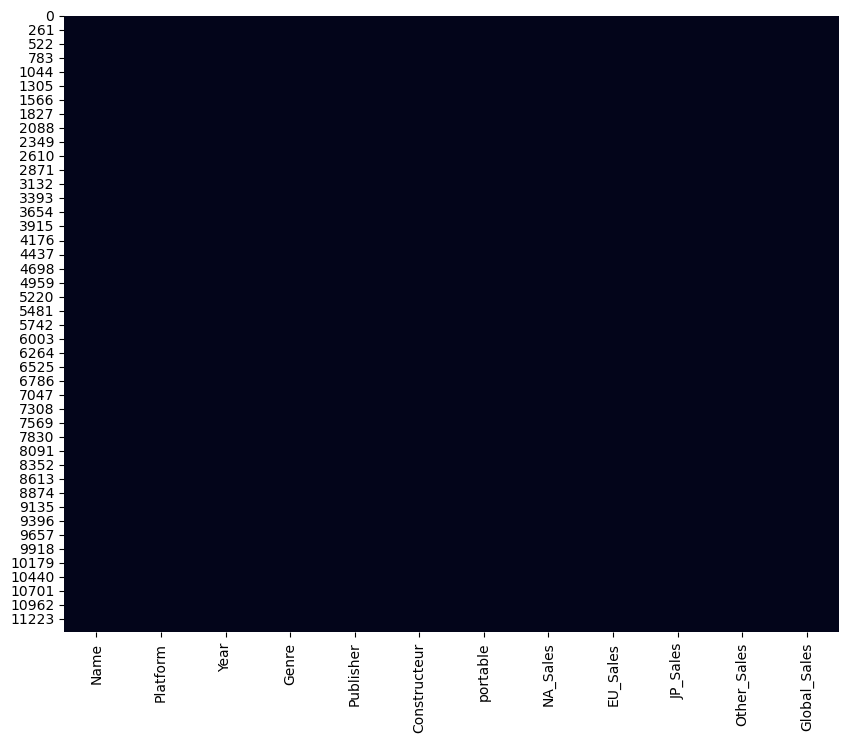

In [21]:
# Représentation visuelle des valeurs manquantes du DataSet
plt.figure(figsize=(10,8))
sns.heatmap(vente_jeu_video.isna(),cbar=False); 

**=> Fichier OK**

# Jonction 1 <a class="anchor" id="jonction1"></a>

## Jonction des DataFrames 'liste_des_jeux_et_notes' avec 'vente_jeu_video' <a class="anchor" id="jonction1.1"></a>

In [25]:
# Jointure ('left' pour enrichir les ventes des jeux du fichier 'vente_jeu_video' 
# avec les informations complémentaires du fichier 'liste_des_jeux_et_notes')
merged1 = pd.merge(vente_jeu_video,liste_des_jeux_et_notes, how='left', on='Name')

In [26]:
merged1.head()

Name  Platform  Year_x          Genre Publisher  \
0                Wii Sports       Wii    2006         Sports  Nintendo   
1         Super Mario Bros.       NES    1985  Platform_game  Nintendo   
2            Mario Kart Wii       Wii    2008         Racing  Nintendo   
3         Wii Sports Resort       Wii    2009         Sports  Nintendo   
4  Pokemon Red/Pokemon Blue  Game Boy    1996            RPG  Nintendo   

  Constructeur portable  NA_Sales  EU_Sales  JP_Sales  Other_Sales  \
0     Nintendo      Non      4149    278592     36569        82908   
1     Nintendo      Non    299524     34726     66738         8085   
2     Nintendo      Non     15216    124936       379        33762   
3     Nintendo      Non      1575      1101     31816        30784   
4     Nintendo      Oui      1127     90678     98112           99   

   Global_Sales  Year_y  Rating  Rating_top  Ratings_count Developers  \
0        812969  2006.0    4.19         4.0          174.0    Inconnu   
1        409073     NaN     NaN         NaN            NaN        NaN   
2        348758  2008.0    4.26         4.0          204.0    Inconnu   
3          3302  2009.0    4.17         4.0           89.0   Nintendo   
4         31139     NaN     NaN         NaN            NaN        NaN   

  Esrb_rating  
0     Inconnu  
1         NaN  
2     Inconnu  
3    Everyone  
4         NaN

In [27]:
merged1.shape

(11460, 18)

## Traitement des manquants dans merged1 <a class="anchor" id="manquants_merged1"></a>

In [29]:
merged1.isna().sum()

Name                0
Platform            0
Year_x              0
Genre               0
Publisher           0
Constructeur        0
portable            0
NA_Sales            0
EU_Sales            0
JP_Sales            0
Other_Sales         0
Global_Sales        0
Year_y           6472
Rating           6472
Rating_top       6472
Ratings_count    6472
Developers       6472
Esrb_rating      6472
dtype: int64

In [30]:
merged1 = merged1.drop(['Year_y'], axis=1)

In [31]:
# Création d'un dictionnaire des valeurs spécifiques pour remplacer les NaN 
# dans 'Developers' et 'Esrb_rating' 
valeurs_de_remplacement = {
    'Developers':'Inconnu',
    'Esrb_rating':'Inconnu'
}

merged1.fillna(value = valeurs_de_remplacement, inplace=True)

In [32]:
merged1.isna().sum()

Name                0
Platform            0
Year_x              0
Genre               0
Publisher           0
Constructeur        0
portable            0
NA_Sales            0
EU_Sales            0
JP_Sales            0
Other_Sales         0
Global_Sales        0
Rating           6472
Rating_top       6472
Ratings_count    6472
Developers          0
Esrb_rating         0
dtype: int64

In [33]:
merged1['Rating'] = merged1['Rating'].fillna(merged1['Rating'].mean())
merged1['Rating_top'] = merged1['Rating_top'].fillna(merged1['Rating_top'].mean())
merged1['Ratings_count'] = merged1['Ratings_count'].fillna(merged1['Ratings_count'].mean())

In [34]:
merged1.isna().sum()

Name             0
Platform         0
Year_x           0
Genre            0
Publisher        0
Constructeur     0
portable         0
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
Global_Sales     0
Rating           0
Rating_top       0
Ratings_count    0
Developers       0
Esrb_rating      0
dtype: int64

In [35]:
merged1.head(3)

Name Platform  Year_x          Genre Publisher Constructeur  \
0         Wii Sports      Wii    2006         Sports  Nintendo     Nintendo   
1  Super Mario Bros.      NES    1985  Platform_game  Nintendo     Nintendo   
2     Mario Kart Wii      Wii    2008         Racing  Nintendo     Nintendo   

  portable  NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales    Rating  \
0      Non      4149    278592     36569        82908        812969  4.190000   
1      Non    299524     34726     66738         8085        409073  1.431897   
2      Non     15216    124936       379        33762        348758  4.260000   

   Rating_top  Ratings_count Developers Esrb_rating  
0    4.000000      174.00000    Inconnu     Inconnu  
1    1.603047       63.98757    Inconnu     Inconnu  
2    4.000000      204.00000    Inconnu     Inconnu

In [36]:
merged1.describe(include='all')

Name       Platform        Year_x   Genre           Publisher  \
count        11460          11460  11460.000000   11460               11460   
unique       11460             26           NaN      12                 567   
top     Wii Sports  PlayStation 2           NaN  Action  Namco Bandai Games   
freq             1           1858           NaN    1921                 754   
mean           NaN            NaN   2005.670070     NaN                 NaN   
std            NaN            NaN      6.044079     NaN                 NaN   
min            NaN            NaN   1980.000000     NaN                 NaN   
25%            NaN            NaN   2002.000000     NaN                 NaN   
50%            NaN            NaN   2007.000000     NaN                 NaN   
75%            NaN            NaN   2010.000000     NaN                 NaN   
max            NaN            NaN   2020.000000     NaN                 NaN   

       Constructeur portable       NA_Sales       EU_Sales      JP_Sales  \
count         11460    11460   11460.000000   11460.000000  11460.000000   
unique           10        2            NaN            NaN           NaN   
top            Sony      Non            NaN            NaN           NaN   
freq           5110     7371            NaN            NaN           NaN   
mean            NaN      NaN    2139.592408    1214.836387    761.125305   
std             NaN      NaN    7700.160181    5591.045969   3063.940822   
min             NaN      NaN       0.000000       0.000000      0.000000   
25%             NaN      NaN       0.000000       0.000000      0.000000   
50%             NaN      NaN     208.000000      97.000000      0.000000   
75%             NaN      NaN    1508.000000     606.000000    312.000000   
max             NaN      NaN  299524.000000  278592.000000  98112.000000   

          Other_Sales   Global_Sales        Rating    Rating_top  \
count    11460.000000   11460.000000  11460.000000  11460.000000   
unique            NaN            NaN           NaN           NaN   
top               NaN            NaN           NaN           NaN   
freq              NaN            NaN           NaN           NaN   
mean       400.792932    5393.518761      1.431897      1.603047   
std       2276.839665   17866.907898      1.214147      1.311772   
min          0.000000       1.000000      0.000000      0.000000   
25%          0.000000     312.000000      0.000000      0.000000   
50%         52.000000    1312.000000      1.431897      1.603047   
75%        206.000000    4327.500000      1.431897      1.603047   
max     120986.000000  812969.000000      4.830000      5.000000   

        Ratings_count Developers Esrb_rating  
count    11460.000000      11460       11460  
unique            NaN       2201           7  
top               NaN    Inconnu     Inconnu  
freq              NaN       7351        9902  
mean        63.987570        NaN         NaN  
std        160.300132        NaN         NaN  
min          0.000000        NaN         NaN  
25%          4.000000        NaN         NaN  
50%         63.987570        NaN         NaN  
75%         63.987570        NaN         NaN  
max       4289.000000        NaN         NaN

**=> Aucun manquant ni doublon dans merge1**

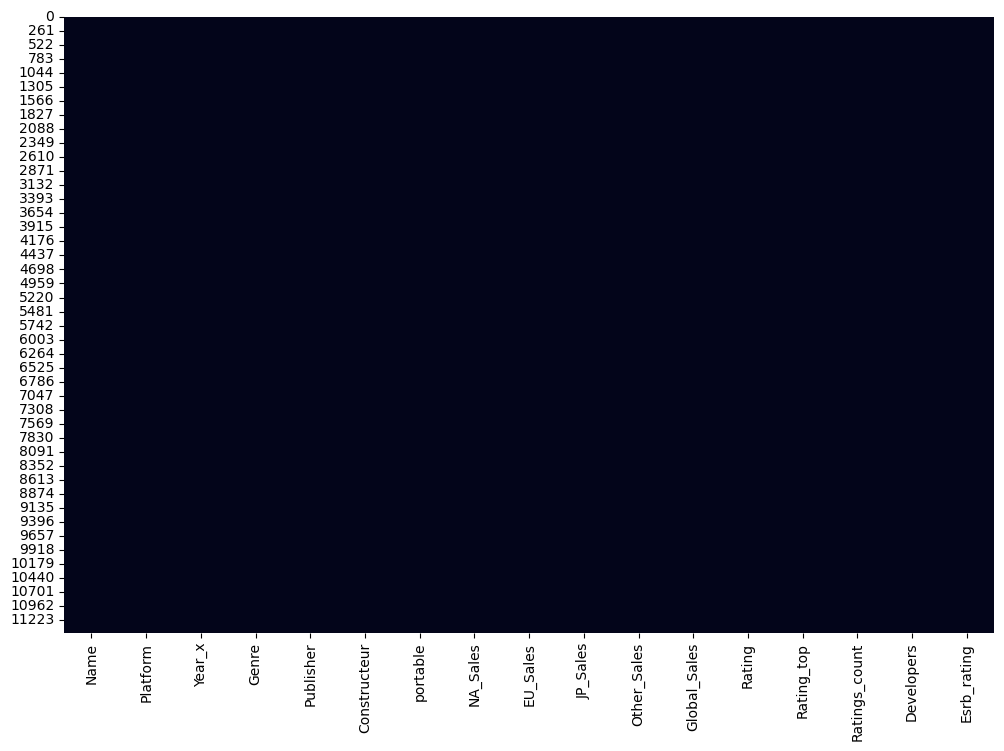

In [38]:
# Représentation visuelle des manquants dans le dataset 
# Suppression de la barre de température
plt.figure(figsize=(12,8))
sns.heatmap(merged1.isna(),cbar=False);

In [39]:
merged1.head(3)

Name Platform  Year_x          Genre Publisher Constructeur  \
0         Wii Sports      Wii    2006         Sports  Nintendo     Nintendo   
1  Super Mario Bros.      NES    1985  Platform_game  Nintendo     Nintendo   
2     Mario Kart Wii      Wii    2008         Racing  Nintendo     Nintendo   

  portable  NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales    Rating  \
0      Non      4149    278592     36569        82908        812969  4.190000   
1      Non    299524     34726     66738         8085        409073  1.431897   
2      Non     15216    124936       379        33762        348758  4.260000   

   Rating_top  Ratings_count Developers Esrb_rating  
0    4.000000      174.00000    Inconnu     Inconnu  
1    1.603047       63.98757    Inconnu     Inconnu  
2    4.000000      204.00000    Inconnu     Inconnu

In [40]:
# Renommage des colonnes 
merged1 = merged1.rename(columns={'Year_x':'Year','portable':'Console portable'})
merged1.head(2)

Name Platform  Year          Genre Publisher Constructeur  \
0         Wii Sports      Wii  2006         Sports  Nintendo     Nintendo   
1  Super Mario Bros.      NES  1985  Platform_game  Nintendo     Nintendo   

  Console portable  NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  \
0              Non      4149    278592     36569        82908        812969   
1              Non    299524     34726     66738         8085        409073   

     Rating  Rating_top  Ratings_count Developers Esrb_rating  
0  4.190000    4.000000      174.00000    Inconnu     Inconnu  
1  1.431897    1.603047       63.98757    Inconnu     Inconnu

## Vérification type de données <a class="anchor" id="verif_merged1"></a>


In [42]:
merged1.dtypes

Name                 object
Platform             object
Year                  int64
Genre                object
Publisher            object
Constructeur         object
Console portable     object
NA_Sales              int64
EU_Sales              int64
JP_Sales              int64
Other_Sales           int64
Global_Sales          int64
Rating              float64
Rating_top          float64
Ratings_count       float64
Developers           object
Esrb_rating          object
dtype: object

## Recherche et traitement des doublons dans merged1 <a class="anchor" id="doublons_merged1"></a>

In [44]:
merged1.describe(include='all')

Name       Platform          Year   Genre           Publisher  \
count        11460          11460  11460.000000   11460               11460   
unique       11460             26           NaN      12                 567   
top     Wii Sports  PlayStation 2           NaN  Action  Namco Bandai Games   
freq             1           1858           NaN    1921                 754   
mean           NaN            NaN   2005.670070     NaN                 NaN   
std            NaN            NaN      6.044079     NaN                 NaN   
min            NaN            NaN   1980.000000     NaN                 NaN   
25%            NaN            NaN   2002.000000     NaN                 NaN   
50%            NaN            NaN   2007.000000     NaN                 NaN   
75%            NaN            NaN   2010.000000     NaN                 NaN   
max            NaN            NaN   2020.000000     NaN                 NaN   

       Constructeur Console portable       NA_Sales       EU_Sales  \
count         11460            11460   11460.000000   11460.000000   
unique           10                2            NaN            NaN   
top            Sony              Non            NaN            NaN   
freq           5110             7371            NaN            NaN   
mean            NaN              NaN    2139.592408    1214.836387   
std             NaN              NaN    7700.160181    5591.045969   
min             NaN              NaN       0.000000       0.000000   
25%             NaN              NaN       0.000000       0.000000   
50%             NaN              NaN     208.000000      97.000000   
75%             NaN              NaN    1508.000000     606.000000   
max             NaN              NaN  299524.000000  278592.000000   

            JP_Sales    Other_Sales   Global_Sales        Rating  \
count   11460.000000   11460.000000   11460.000000  11460.000000   
unique           NaN            NaN            NaN           NaN   
top              NaN            NaN            NaN           NaN   
freq             NaN            NaN            NaN           NaN   
mean      761.125305     400.792932    5393.518761      1.431897   
std      3063.940822    2276.839665   17866.907898      1.214147   
min         0.000000       0.000000       1.000000      0.000000   
25%         0.000000       0.000000     312.000000      0.000000   
50%         0.000000      52.000000    1312.000000      1.431897   
75%       312.000000     206.000000    4327.500000      1.431897   
max     98112.000000  120986.000000  812969.000000      4.830000   

          Rating_top  Ratings_count Developers Esrb_rating  
count   11460.000000   11460.000000      11460       11460  
unique           NaN            NaN       2201           7  
top              NaN            NaN    Inconnu     Inconnu  
freq             NaN            NaN       7351        9902  
mean        1.603047      63.987570        NaN         NaN  
std         1.311772     160.300132        NaN         NaN  
min         0.000000       0.000000        NaN         NaN  
25%         0.000000       4.000000        NaN         NaN  
50%         1.603047      63.987570        NaN         NaN  
75%         1.603047      63.987570        NaN         NaN  
max         5.000000    4289.000000        NaN         NaN

**=> Aucun doublon dans merge1**

In [46]:
merged1.isna().sum()

Name                0
Platform            0
Year                0
Genre               0
Publisher           0
Constructeur        0
Console portable    0
NA_Sales            0
EU_Sales            0
JP_Sales            0
Other_Sales         0
Global_Sales        0
Rating              0
Rating_top          0
Ratings_count       0
Developers          0
Esrb_rating         0
dtype: int64

In [47]:
merged1.head(2)

Name Platform  Year          Genre Publisher Constructeur  \
0         Wii Sports      Wii  2006         Sports  Nintendo     Nintendo   
1  Super Mario Bros.      NES  1985  Platform_game  Nintendo     Nintendo   

  Console portable  NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  \
0              Non      4149    278592     36569        82908        812969   
1              Non    299524     34726     66738         8085        409073   

     Rating  Rating_top  Ratings_count Developers Esrb_rating  
0  4.190000    4.000000      174.00000    Inconnu     Inconnu  
1  1.431897    1.603047       63.98757    Inconnu     Inconnu

# Jonction 2 <a class="anchor" id="jonction2"></a>

## Chargement du DataFrame 'vente_consoles' <a class="anchor" id="chargement2"></a>

In [50]:
vente_consoles = pd.read_csv('vente_de_console_2022_clean.csv', sep=',',encoding='utf_8', low_memory=False)
vente_consoles

Platform Constructeur  Date de Sortie  Vente (en million)
0      PlayStation 2         Sony            2000            158.0000
1        Nintendo DS     Nintendo            2004            157.1004
2    Nintendo Switch     Nintendo            2017            126.8762
3     Game Boy Color     Nintendo            1989            118.6900
4      PlayStation 4         Sony            2013            115.8300
5        PlayStation         Sony            1994            103.4240
6                Wii     Nintendo            2006             99.5974
7      PlayStation 3         Sony            2006             87.9040
8           Xbox 360    Microsoft            2005             83.2000
9                PSP         Sony            2004             81.9750
10  Game Boy Advance     Nintendo            2001             78.2496
11      Nintendo 3DS     Nintendo            2011             75.9400
12               NES     Nintendo            1983             60.6718
13          Xbox One    Microsoft            2013             59.7400
14    Super Nintendo     Nintendo            1990             47.1360
15     PlayStation 5         Sony            2020             43.3680
16       Nintendo 64     Nintendo            1996             31.6128
17        Mega Drive         Sega            1988             31.0575
18        Atari 2600        Atari            1977             30.6000
19              Xbox    Microsoft            2001             24.0000

## Jonction des fichiers 'merged1' avec 'vente_de_console_2022' <a class="anchor" id="jonction2.1"></a>

In [52]:
# Fusion externe gauche (left join) : enrichi merged1 de données contenues dans le fichier des ventes de consoles 
# là où les Platform correspondent. 

merged2 = pd.merge(merged1, vente_consoles, how='left', indicator=True, on='Platform')

In [53]:
merged2.head(3)

Name Platform  Year          Genre Publisher Constructeur_x  \
0         Wii Sports      Wii  2006         Sports  Nintendo       Nintendo   
1  Super Mario Bros.      NES  1985  Platform_game  Nintendo       Nintendo   
2     Mario Kart Wii      Wii  2008         Racing  Nintendo       Nintendo   

  Console portable  NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  \
0              Non      4149    278592     36569        82908        812969   
1              Non    299524     34726     66738         8085        409073   
2              Non     15216    124936       379        33762        348758   

     Rating  Rating_top  Ratings_count Developers Esrb_rating Constructeur_y  \
0  4.190000    4.000000      174.00000    Inconnu     Inconnu       Nintendo   
1  1.431897    1.603047       63.98757    Inconnu     Inconnu       Nintendo   
2  4.260000    4.000000      204.00000    Inconnu     Inconnu       Nintendo   

   Date de Sortie  Vente (en million) _merge  
0          2006.0             99.5974   both  
1          1983.0             60.6718   both  
2          2006.0             99.5974   both

In [54]:
merged2._merge.value_counts()

_merge
both          9929
left_only     1531
right_only       0
Name: count, dtype: int64

In [55]:
merged2.isna().sum()

Name                     0
Platform                 0
Year                     0
Genre                    0
Publisher                0
Constructeur_x           0
Console portable         0
NA_Sales                 0
EU_Sales                 0
JP_Sales                 0
Other_Sales              0
Global_Sales             0
Rating                   0
Rating_top               0
Ratings_count            0
Developers               0
Esrb_rating              0
Constructeur_y        1531
Date de Sortie        1531
Vente (en million)    1531
_merge                   0
dtype: int64

In [56]:
merged2['Constructeur_x'].unique()

array(['Nintendo', 'Microsoft', 'Sony', 'PC', 'Atari', 'Sega',
       'Dreamcast', 'Saturne', '3DO', 'Game Gear'], dtype=object)

In [57]:
merged2['Constructeur_y'].unique()

array(['Nintendo', nan, 'Microsoft', 'Sony', 'Atari'], dtype=object)

In [58]:
merged2.shape

(11460, 21)

In [59]:
# Suppression de colonnes inutiles ou redondantes
merged2 = merged2.drop(['Constructeur_y'], axis=1)
# On laisse plutôt Constructeur_x car Constructeur_y contient plus d'informations
merged2.head(3)

Name Platform  Year          Genre Publisher Constructeur_x  \
0         Wii Sports      Wii  2006         Sports  Nintendo       Nintendo   
1  Super Mario Bros.      NES  1985  Platform_game  Nintendo       Nintendo   
2     Mario Kart Wii      Wii  2008         Racing  Nintendo       Nintendo   

  Console portable  NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  \
0              Non      4149    278592     36569        82908        812969   
1              Non    299524     34726     66738         8085        409073   
2              Non     15216    124936       379        33762        348758   

     Rating  Rating_top  Ratings_count Developers Esrb_rating  Date de Sortie  \
0  4.190000    4.000000      174.00000    Inconnu     Inconnu          2006.0   
1  1.431897    1.603047       63.98757    Inconnu     Inconnu          1983.0   
2  4.260000    4.000000      204.00000    Inconnu     Inconnu          2006.0   

   Vente (en million) _merge  
0             99.5974   both  
1             60.6718   both  
2             99.5974   both

In [60]:
merged2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11460 entries, 0 to 11459
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Name                11460 non-null  object  
 1   Platform            11460 non-null  object  
 2   Year                11460 non-null  int64   
 3   Genre               11460 non-null  object  
 4   Publisher           11460 non-null  object  
 5   Constructeur_x      11460 non-null  object  
 6   Console portable    11460 non-null  object  
 7   NA_Sales            11460 non-null  int64   
 8   EU_Sales            11460 non-null  int64   
 9   JP_Sales            11460 non-null  int64   
 10  Other_Sales         11460 non-null  int64   
 11  Global_Sales        11460 non-null  int64   
 12  Rating              11460 non-null  float64 
 13  Rating_top          11460 non-null  float64 
 14  Ratings_count       11460 non-null  float64 
 15  Developers          11460 non-null  

In [61]:
merged2 = merged2.rename(columns={'Name':'Nom du jeu','Year':'Date de sortie du jeu','Publisher':'Editeur','Rating':'Note moyenne','Rating_top':'Note la plus haute','Ratings_count':'Nombre de note','Platform':'Console','Constructeur_x':'Constructeur','NA_Sales':'Vente Amérique du Nord','EU_Sales':'Vente Europe', 'JP_Sales':'Vente Japon','Other_Sales':'Vente autres régions','Global_Sales':'Vente mondiale','Developers':'Développeur','Date de Sortie':'Date de Sortie de la console','Vente (en million)':'Vente de console (en million)'})
merged2.head(3)

Nom du jeu Console  Date de sortie du jeu          Genre   Editeur  \
0         Wii Sports     Wii                   2006         Sports  Nintendo   
1  Super Mario Bros.     NES                   1985  Platform_game  Nintendo   
2     Mario Kart Wii     Wii                   2008         Racing  Nintendo   

  Constructeur Console portable  Vente Amérique du Nord  Vente Europe  \
0     Nintendo              Non                    4149        278592   
1     Nintendo              Non                  299524         34726   
2     Nintendo              Non                   15216        124936   

   Vente Japon  Vente autres régions  Vente mondiale  Note moyenne  \
0        36569                 82908          812969      4.190000   
1        66738                  8085          409073      1.431897   
2          379                 33762          348758      4.260000   

   Note la plus haute  Nombre de note Développeur Esrb_rating  \
0            4.000000       174.00000     Inconnu     Inconnu   
1            1.603047        63.98757     Inconnu     Inconnu   
2            4.000000       204.00000     Inconnu     Inconnu   

   Date de Sortie de la console  Vente de console (en million) _merge  
0                        2006.0                        99.5974   both  
1                        1983.0                        60.6718   both  
2                        2006.0                        99.5974   both

In [62]:
# Suppression de '_merge'
merged2 = merged2.drop(['_merge'], axis=1)
merged2.head(3)

Nom du jeu Console  Date de sortie du jeu          Genre   Editeur  \
0         Wii Sports     Wii                   2006         Sports  Nintendo   
1  Super Mario Bros.     NES                   1985  Platform_game  Nintendo   
2     Mario Kart Wii     Wii                   2008         Racing  Nintendo   

  Constructeur Console portable  Vente Amérique du Nord  Vente Europe  \
0     Nintendo              Non                    4149        278592   
1     Nintendo              Non                  299524         34726   
2     Nintendo              Non                   15216        124936   

   Vente Japon  Vente autres régions  Vente mondiale  Note moyenne  \
0        36569                 82908          812969      4.190000   
1        66738                  8085          409073      1.431897   
2          379                 33762          348758      4.260000   

   Note la plus haute  Nombre de note Développeur Esrb_rating  \
0            4.000000       174.00000     Inconnu     Inconnu   
1            1.603047        63.98757     Inconnu     Inconnu   
2            4.000000       204.00000     Inconnu     Inconnu   

   Date de Sortie de la console  Vente de console (en million)  
0                        2006.0                        99.5974  
1                        1983.0                        60.6718  
2                        2006.0                        99.5974

## Traitement des manquants dans merged2 <a class="anchor" id="manquants_merged2"></a>

In [64]:
# Imputation par la médiane (meilleure pour gérer des années)
merged2['Date de Sortie de la console'] = merged2['Date de Sortie de la console'].fillna(merged2['Date de Sortie de la console'].median())

# Imputation par la moyenne 
merged2['Vente de console (en million)'] = merged2['Vente de console (en million)'].fillna(merged2['Vente de console (en million)'].mean())
merged2.isna().sum()

Nom du jeu                       0
Console                          0
Date de sortie du jeu            0
Genre                            0
Editeur                          0
Constructeur                     0
Console portable                 0
Vente Amérique du Nord           0
Vente Europe                     0
Vente Japon                      0
Vente autres régions             0
Vente mondiale                   0
Note moyenne                     0
Note la plus haute               0
Nombre de note                   0
Développeur                      0
Esrb_rating                      0
Date de Sortie de la console     0
Vente de console (en million)    0
dtype: int64

## Recherche et traitement des doublons dans merged2 <a class="anchor" id="doublons_merged2"></a>

In [66]:
merged2.describe(include='all')

Nom du jeu        Console  Date de sortie du jeu   Genre  \
count        11460          11460           11460.000000   11460   
unique       11460             26                    NaN      12   
top     Wii Sports  PlayStation 2                    NaN  Action   
freq             1           1858                    NaN    1921   
mean           NaN            NaN            2005.670070     NaN   
std            NaN            NaN               6.044079     NaN   
min            NaN            NaN            1980.000000     NaN   
25%            NaN            NaN            2002.000000     NaN   
50%            NaN            NaN            2007.000000     NaN   
75%            NaN            NaN            2010.000000     NaN   
max            NaN            NaN            2020.000000     NaN   

                   Editeur Constructeur Console portable  \
count                11460        11460            11460   
unique                 567           10                2   
top     Namco Bandai Games         Sony              Non   
freq                   754         5110             7371   
mean                   NaN          NaN              NaN   
std                    NaN          NaN              NaN   
min                    NaN          NaN              NaN   
25%                    NaN          NaN              NaN   
50%                    NaN          NaN              NaN   
75%                    NaN          NaN              NaN   
max                    NaN          NaN              NaN   

        Vente Amérique du Nord   Vente Europe   Vente Japon  \
count             11460.000000   11460.000000  11460.000000   
unique                     NaN            NaN           NaN   
top                        NaN            NaN           NaN   
freq                       NaN            NaN           NaN   
mean               2139.592408    1214.836387    761.125305   
std                7700.160181    5591.045969   3063.940822   
min                   0.000000       0.000000      0.000000   
25%                   0.000000       0.000000      0.000000   
50%                 208.000000      97.000000      0.000000   
75%                1508.000000     606.000000    312.000000   
max              299524.000000  278592.000000  98112.000000   

        Vente autres régions  Vente mondiale  Note moyenne  \
count           11460.000000    11460.000000  11460.000000   
unique                   NaN             NaN           NaN   
top                      NaN             NaN           NaN   
freq                     NaN             NaN           NaN   
mean              400.792932     5393.518761      1.431897   
std              2276.839665    17866.907898      1.214147   
min                 0.000000        1.000000      0.000000   
25%                 0.000000      312.000000      0.000000   
50%                52.000000     1312.000000      1.431897   
75%               206.000000     4327.500000      1.431897   
max            120986.000000   812969.000000      4.830000   

        Note la plus haute  Nombre de note Développeur Esrb_rating  \
count         11460.000000    11460.000000       11460       11460   
unique                 NaN             NaN        2201           7   
top                    NaN             NaN     Inconnu     Inconnu   
freq                   NaN             NaN        7351        9902   
mean              1.603047       63.987570         NaN         NaN   
std               1.311772      160.300132         NaN         NaN   
min               0.000000        0.000000         NaN         NaN   
25%               0.000000        4.000000         NaN         NaN   
50%               1.603047       63.987570         NaN         NaN   
75%               1.603047       63.987570         NaN         NaN   
max               5.000000     4289.000000         NaN         NaN   

        Date de Sortie de la console  Vente de console (en million)  
count                   11460.000000                   11

In [67]:
merged2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11460 entries, 0 to 11459
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Nom du jeu                     11460 non-null  object 
 1   Console                        11460 non-null  object 
 2   Date de sortie du jeu          11460 non-null  int64  
 3   Genre                          11460 non-null  object 
 4   Editeur                        11460 non-null  object 
 5   Constructeur                   11460 non-null  object 
 6   Console portable               11460 non-null  object 
 7   Vente Amérique du Nord         11460 non-null  int64  
 8   Vente Europe                   11460 non-null  int64  
 9   Vente Japon                    11460 non-null  int64  
 10  Vente autres régions           11460 non-null  int64  
 11  Vente mondiale                 11460 non-null  int64  
 12  Note moyenne                   11460 non-null 

In [68]:
merged2['Date de Sortie de la console'] = merged2['Date de Sortie de la console'].astype(int)

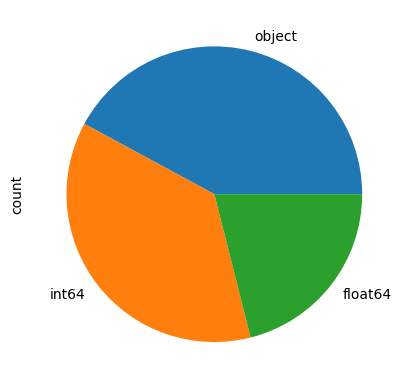

In [69]:
merged2.dtypes.value_counts().plot.pie();

<a class="anchor" id="jeu_donnees_final"></a>
<div style="display: flex; background-color: cyan;" >
<h1 style="margin: auto; padding: 15px; "> B. Jeu de données historiques consolidé </h1>
</div>

In [71]:
fichier_final = merged2
fichier_final.head(3)
                  

Nom du jeu Console  Date de sortie du jeu          Genre   Editeur  \
0         Wii Sports     Wii                   2006         Sports  Nintendo   
1  Super Mario Bros.     NES                   1985  Platform_game  Nintendo   
2     Mario Kart Wii     Wii                   2008         Racing  Nintendo   

  Constructeur Console portable  Vente Amérique du Nord  Vente Europe  \
0     Nintendo              Non                    4149        278592   
1     Nintendo              Non                  299524         34726   
2     Nintendo              Non                   15216        124936   

   Vente Japon  Vente autres régions  Vente mondiale  Note moyenne  \
0        36569                 82908          812969      4.190000   
1        66738                  8085          409073      1.431897   
2          379                 33762          348758      4.260000   

   Note la plus haute  Nombre de note Développeur Esrb_rating  \
0            4.000000       174.00000     Inconnu     Inconnu   
1            1.603047        63.98757     Inconnu     Inconnu   
2            4.000000       204.00000     Inconnu     Inconnu   

   Date de Sortie de la console  Vente de console (en million)  
0                          2006                        99.5974  
1                          1983                        60.6718  
2                          2006                        99.5974

In [72]:
fichier_final.shape

(11460, 19)

<a class="anchor" id="exploration"></a>
<div style="display: flex; background-color: cyan;" >
<h1 style="margin: auto; padding: 15px; "> C. Exploration & analyse </h1>
</div>

In [74]:
fichier_final.describe(include='all')

Nom du jeu        Console  Date de sortie du jeu   Genre  \
count        11460          11460           11460.000000   11460   
unique       11460             26                    NaN      12   
top     Wii Sports  PlayStation 2                    NaN  Action   
freq             1           1858                    NaN    1921   
mean           NaN            NaN            2005.670070     NaN   
std            NaN            NaN               6.044079     NaN   
min            NaN            NaN            1980.000000     NaN   
25%            NaN            NaN            2002.000000     NaN   
50%            NaN            NaN            2007.000000     NaN   
75%            NaN            NaN            2010.000000     NaN   
max            NaN            NaN            2020.000000     NaN   

                   Editeur Constructeur Console portable  \
count                11460        11460            11460   
unique                 567           10                2   
top     Namco Bandai Games         Sony              Non   
freq                   754         5110             7371   
mean                   NaN          NaN              NaN   
std                    NaN          NaN              NaN   
min                    NaN          NaN              NaN   
25%                    NaN          NaN              NaN   
50%                    NaN          NaN              NaN   
75%                    NaN          NaN              NaN   
max                    NaN          NaN              NaN   

        Vente Amérique du Nord   Vente Europe   Vente Japon  \
count             11460.000000   11460.000000  11460.000000   
unique                     NaN            NaN           NaN   
top                        NaN            NaN           NaN   
freq                       NaN            NaN           NaN   
mean               2139.592408    1214.836387    761.125305   
std                7700.160181    5591.045969   3063.940822   
min                   0.000000       0.000000      0.000000   
25%                   0.000000       0.000000      0.000000   
50%                 208.000000      97.000000      0.000000   
75%                1508.000000     606.000000    312.000000   
max              299524.000000  278592.000000  98112.000000   

        Vente autres régions  Vente mondiale  Note moyenne  \
count           11460.000000    11460.000000  11460.000000   
unique                   NaN             NaN           NaN   
top                      NaN             NaN           NaN   
freq                     NaN             NaN           NaN   
mean              400.792932     5393.518761      1.431897   
std              2276.839665    17866.907898      1.214147   
min                 0.000000        1.000000      0.000000   
25%                 0.000000      312.000000      0.000000   
50%                52.000000     1312.000000      1.431897   
75%               206.000000     4327.500000      1.431897   
max            120986.000000   812969.000000      4.830000   

        Note la plus haute  Nombre de note Développeur Esrb_rating  \
count         11460.000000    11460.000000       11460       11460   
unique                 NaN             NaN        2201           7   
top                    NaN             NaN     Inconnu     Inconnu   
freq                   NaN             NaN        7351        9902   
mean              1.603047       63.987570         NaN         NaN   
std               1.311772      160.300132         NaN         NaN   
min               0.000000        0.000000         NaN         NaN   
25%               0.000000        4.000000         NaN         NaN   
50%               1.603047       63.987570         NaN         NaN   
75%               1.603047       63.987570         NaN         NaN   
max               5.000000     4289.000000         NaN         NaN   

        Date de Sortie de la console  Vente de console (en million)  
count                   11460.000000                   11

<a class="anchor" id="jeux"></a>
<div style="display: flex; background-color: magenta;" >
<h2 style="margin: auto; padding: 15px; color:white; "> Les jeux  </h2>
</div>

<a class="anchor" id="Nb_jeux_periode"></a>
<div style="display: flex; background-color: purple;" >
<h3 style="margin: auto; padding: 15px; color:white; "> Nombre de références de jeux vidéo sortis de 2000 à 2020 (soit en 20 ans) </h3>

In [77]:
Nb_jeux_video_sorti_20ans = liste_des_jeux_et_notes['Name'].value_counts().sum()

print(f"Le nombre de références de jeux vidéo sortis sur la période 2000 à 2020 est de {Nb_jeux_video_sorti_20ans:.0f}.")

Le nombre de références de jeux vidéo sortis sur la période 2000 à 2020 est de 440874.


<a class="anchor" id="distrib_temps"></a>
<div style="display: flex; background-color: purple;" >
<h3 style="margin: auto; padding: 15px; color:white; "> Distribution du nombre de jeux vidéo sortis dans le temps </h3>
</div>

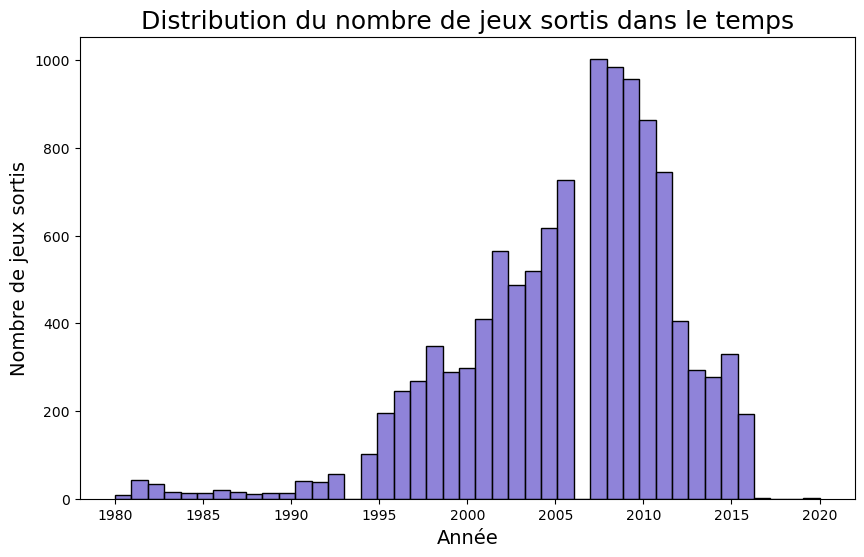

In [79]:
# Distribution du nombre de sortie par date

plt.figure(figsize=(10, 6))
sns.histplot(fichier_final['Date de sortie du jeu'], bins=43, kde=False, color='slateblue')
plt.title("Distribution du nombre de jeux sortis dans le temps",fontsize=18)
plt.ylabel("Nombre de jeux sortis",fontsize=14)
plt.xlabel("Année",fontsize=14)
plt.show();

<a class="anchor" id="jeux_categ_esrb"></a>
<div style="display: flex; background-color: purple;" >
<h3 style="margin: auto; padding: 15px; color:white; "> Nombre de jeux vidéo par catégorie Esrb </h3>
</div>

In [81]:
fichier_final['Esrb_rating'].unique()

array(['Inconnu', 'Everyone', 'Mature', 'Teen', 'Everyone 10+',
       'Adults Only', 'Rating Pending'], dtype=object)

In [82]:
# Comptage des jeux par Esrb_rating
jeux_par_esrb = fichier_final['Esrb_rating'].value_counts().reset_index()
# Renommage colonne
jeux_par_esrb.columns = ['Esrb_rating', 'Nombre de jeux']
jeux_par_esrb

Esrb_rating  Nombre de jeux
0         Inconnu            9902
1            Teen             563
2    Everyone 10+             377
3          Mature             364
4        Everyone             222
5     Adults Only              30
6  Rating Pending               2

/var/folders/33/vzq1dtn92x30kxs762l39sdm0000gn/T/ipykernel_60775/3270743894.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Esrb_rating', y='Nombre de jeux', data=jeux_par_esrb, palette='dark')


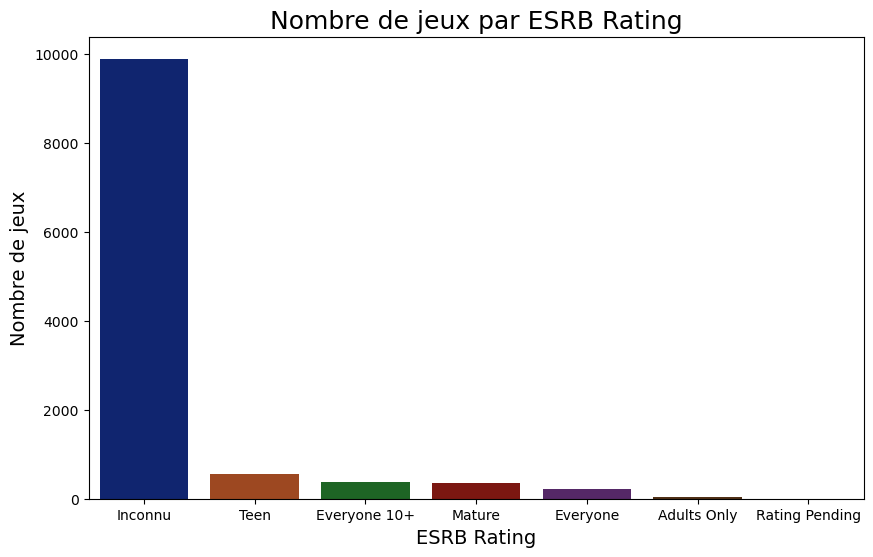

In [83]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Esrb_rating', y='Nombre de jeux', data=jeux_par_esrb, palette='dark')
plt.title("Nombre de jeux par ESRB Rating",fontsize=18)
plt.xlabel("ESRB Rating",fontsize=14)
plt.ylabel("Nombre de jeux",fontsize=14)
plt.show()

 **=> Les jeux vidéo dont les ventes sont supérieures à 100000 unités et dont on connaît la classification Esrb appartiennent principalement à la catégorie 'Teen','Mature' et 'Everyone 10 +'. Il faut cependant noter que le nombre important d'inconnu pour cette variable ne nous permet pas de conclure.**

<a class="anchor" id="Ventes"></a>
<div style="display: flex; background-color: magenta;" >
<h2 style="margin: auto; padding: 15px; color:white; "> Les ventes  </h2>
</div>

<a class="anchor" id="nb_jeux_vendussup100k"></a>
<div style="display: flex; background-color: purple;" >
<h3 style="margin: auto; padding: 15px; color:white; "> Nombre de reférences de jeux vidéo vendus à plus de 100000 exemplaires sur 40 ans </h3>
</div>

In [87]:
Nb_jeux_video_vente_sup_100k = fichier_final['Nom du jeu'].value_counts().sum()
print(f"Le nombre de références de jeux vidéo vendus à plus de 100000 exemplaires sur la période 1980 à 2020 est de {Nb_jeux_video_vente_sup_100k:.0f}.")

Le nombre de références de jeux vidéo vendus à plus de 100000 exemplaires sur la période 1980 à 2020 est de 11460.


<a class="anchor" id="vente_moy"></a>
<div style="display: flex; background-color: purple;" >
<h3 style="margin: auto; padding: 15px; color:white; "> Ventes mondiales moyennes des jeux vendus à plus de 100000 exemplaires </h3>
</div>

In [89]:
moyenne_ventes_globales = fichier_final['Vente mondiale'].mean()
print(f"La moyenne des ventes mondiales des jeux de plus de 100000 exemplaires vendus est de {moyenne_ventes_globales:.0f} millions d'unités vendues.")

La moyenne des ventes mondiales des jeux de plus de 100000 exemplaires vendus est de 5394 millions d'unités vendues.


<a class="anchor" id="vente_totale_20ans"></a>
<div style="display: flex; background-color: purple;" >
<h3 style="margin: auto; padding: 15px; color:white; "> Ventes totales sur la période des jeux vidéo vendus à plus de 100000 exemplaires dans le monde </h3>
</div>

In [91]:
# Calcul des ventes globales totales
vente_total = fichier_final['Vente mondiale'].sum()

print(f"Les ventes globales totales de jeux vidéo sur la période 1980 - 2020 (40 ans) sont de {vente_total:.0f} millions d'unités vendues.")

Les ventes globales totales de jeux vidéo sur la période 1980 - 2020 (40 ans) sont de 61809725 millions d'unités vendues.


**Soit près de 61810 milliards d'unités vendues sur la période 1980 - 2020 (40 ans) !** 


<a class="anchor" id="portablevsnonportable"></a>
<div style="display: flex; background-color: purple;" >
<h3 style="margin: auto; padding: 15px; color:white; "> Comparaison des jeux portables vs non portables </h3>
</div>

In [94]:
fichier_final.head(3)

Nom du jeu Console  Date de sortie du jeu          Genre   Editeur  \
0         Wii Sports     Wii                   2006         Sports  Nintendo   
1  Super Mario Bros.     NES                   1985  Platform_game  Nintendo   
2     Mario Kart Wii     Wii                   2008         Racing  Nintendo   

  Constructeur Console portable  Vente Amérique du Nord  Vente Europe  \
0     Nintendo              Non                    4149        278592   
1     Nintendo              Non                  299524         34726   
2     Nintendo              Non                   15216        124936   

   Vente Japon  Vente autres régions  Vente mondiale  Note moyenne  \
0        36569                 82908          812969      4.190000   
1        66738                  8085          409073      1.431897   
2          379                 33762          348758      4.260000   

   Note la plus haute  Nombre de note Développeur Esrb_rating  \
0            4.000000       174.00000     Inconnu     Inconnu   
1            1.603047        63.98757     Inconnu     Inconnu   
2            4.000000       204.00000     Inconnu     Inconnu   

   Date de Sortie de la console  Vente de console (en million)  
0                          2006                        99.5974  
1                          1983                        60.6718  
2                          2006                        99.5974

/var/folders/33/vzq1dtn92x30kxs762l39sdm0000gn/T/ipykernel_60775/3153410605.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Console portable', y='Vente mondiale', data=ventes_jeux_portables, palette='icefire')


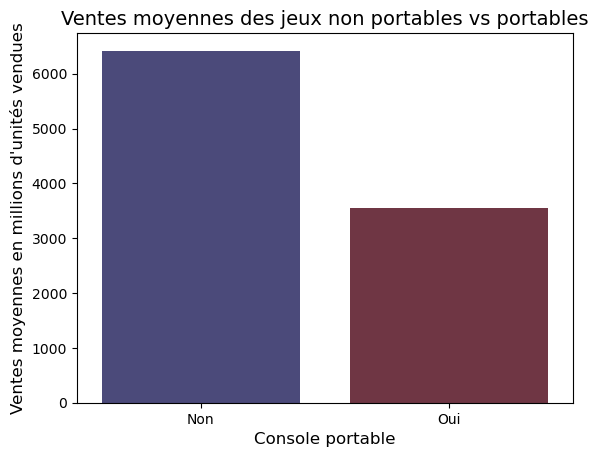

In [95]:
ventes_jeux_portables = fichier_final.groupby('Console portable')['Vente mondiale'].mean().reset_index()

sns.barplot(x='Console portable', y='Vente mondiale', data=ventes_jeux_portables, palette='icefire')
plt.title("Ventes moyennes des jeux non portables vs portables",fontsize=14)
plt.xlabel("Console portable",fontsize=12)
plt.ylabel("Ventes moyennes en millions d'unités vendues",fontsize=12)
plt.show()

**=> Les jeux sur consoles de salon se vendent mieux que ceux sur consoles portables.**

<a class="anchor" id="vente_segment"></a>
<div style="display: flex; background-color: magenta;" >
<h2 style="margin: auto; padding: 15px; color:white; "> Les ventes par segment  </h2>
</div>

<a class="anchor" id="anal_region"></a>
<div style="display: flex; background-color: purple;" >
<h3 style="margin: auto; padding: 15px; color:white; "> Analyse des ventes par région du monde </h3>
</div>

In [99]:
ventes_par_region = fichier_final[['Vente Amérique du Nord', 'Vente Europe', 'Vente Japon', 'Vente autres régions']].sum()
ventes_par_region

Vente Amérique du Nord    24519729
Vente Europe              13922025
Vente Japon                8722496
Vente autres régions       4593087
dtype: int64

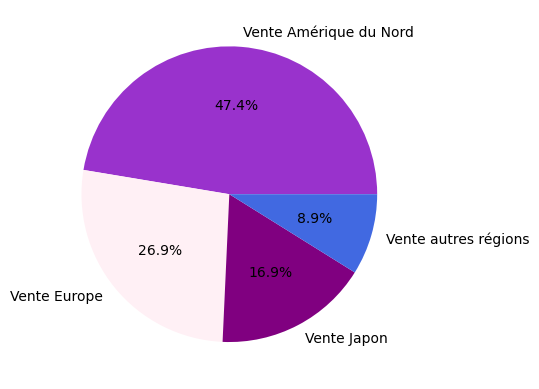

In [100]:
ventes_par_region.plot.pie(autopct='%1.1f%%', colors = ['darkorchid','lavenderblush','purple','royalblue']);

<a class="anchor" id="calcul_vente_genre_region"></a>
<div style="display: flex; background-color: purple;" >
<h3 style="margin: auto; padding: 15px; color:white; "> Calcul des ventes par genre et par région </h3>
</div>

In [102]:
# Groupement par 'Genre' et somme des ventes par région
ventes_par_genre_et_region = fichier_final.groupby('Genre').agg({
    'Vente Amérique du Nord': 'sum',
    'Vente Europe': 'sum',
    'Vente Japon': 'sum',
    'Vente autres régions': 'sum'
}).reset_index()

ventes_par_genre_et_region = pd.DataFrame (ventes_par_genre_et_region)


In [103]:
print(ventes_par_genre_et_region.dtypes)

Genre                     object
Vente Amérique du Nord     int64
Vente Europe               int64
Vente Japon                int64
Vente autres régions       int64
dtype: object


<a class="anchor" id="Treemap_genre_region"></a>
<div style="display: flex; background-color: purple;" >
<h4 style="margin: auto; padding: 15px; color:white; "> Treemap des ventes régionales par genre </h4>
</div>

In [105]:


# Transformation des données en un format "long" pour faciliter la création d'une Treemap
ventes_long = ventes_par_genre_et_region.melt(id_vars='Genre', 
                                            var_name='Region', 
                                            value_name='Ventes')

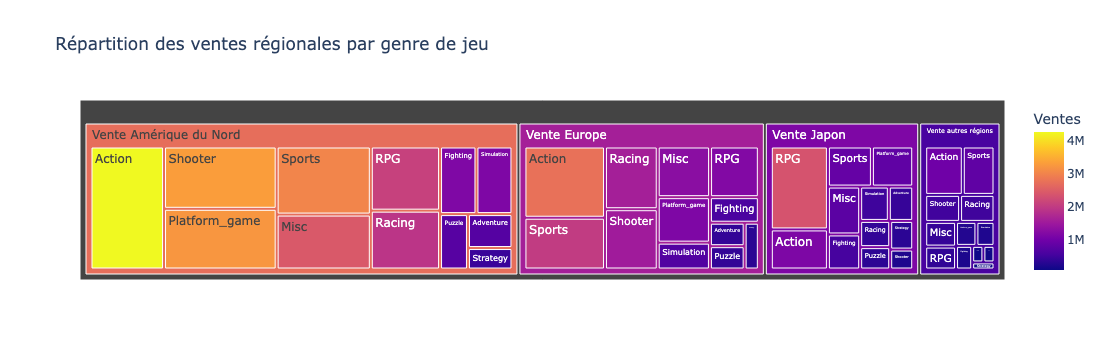

In [106]:
# Création de la Treemap

fig = px.treemap(
    ventes_long,
    path=['Region', 'Genre'],  # Hiérarchie : Région > Genre
    values='Ventes',          # tailles des blocs sont basées sur les ventes
    color='Ventes',           # couleurs représentent également les ventes
    color_continuous_scale='plasma',  # Palette de couleurs
    title='Répartition des ventes régionales par genre de jeu',
)

# Afficher la Treemap
fig.show()

**Ce Treemap nous permet de comprendre quels types de jeux (ou genres de jeux) se vendent le mieux selon les régions où ils sont vendus.**

<a class="anchor" id="anal_genre_popu"></a>
<div style="display: flex; background-color: purple;" >
<h3 style="margin: auto; padding: 15px; color:white; "> Analyse des genres les plus populaires </h3>
</div>

In [109]:
ventes_par_genre = fichier_final.groupby('Genre')['Vente mondiale'].sum().reset_index().sort_values(by='Vente mondiale', ascending=False)
ventes_par_genre

Genre  Vente mondiale
0          Action        10811619
10         Sports         8417190
6             RPG         7210583
4   Platform_game         6389392
8         Shooter         6371873
3            Misc         5830827
7          Racing         5408201
9      Simulation         3168156
2        Fighting         3156236
5          Puzzle         2009990
1       Adventure         1725962
11       Strategy         1309696

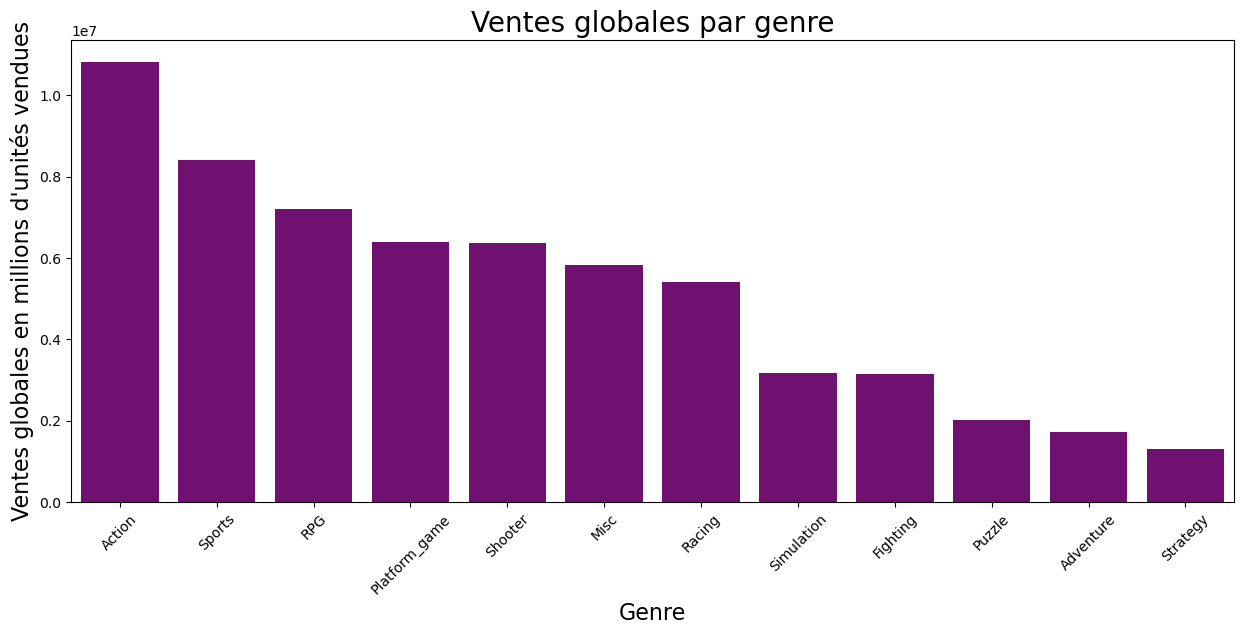

In [110]:
plt.figure(figsize=(15,6))
sns.barplot(x='Genre', y='Vente mondiale', data=ventes_par_genre, color='purple')
plt.title("Ventes globales par genre",fontsize=20)
plt.xlabel("Genre",fontsize=16)
plt.ylabel("Ventes globales en millions d'unités vendues",fontsize=16)
plt.xticks(rotation=45)
plt.show();

<a class="anchor" id="boxplot_genre"></a>
<div style="display: flex; background-color: purple;" >
<h3 style="margin: auto; padding: 15px; color:white; "> BoxPlots des ventes totales par genre </h3>
</div>

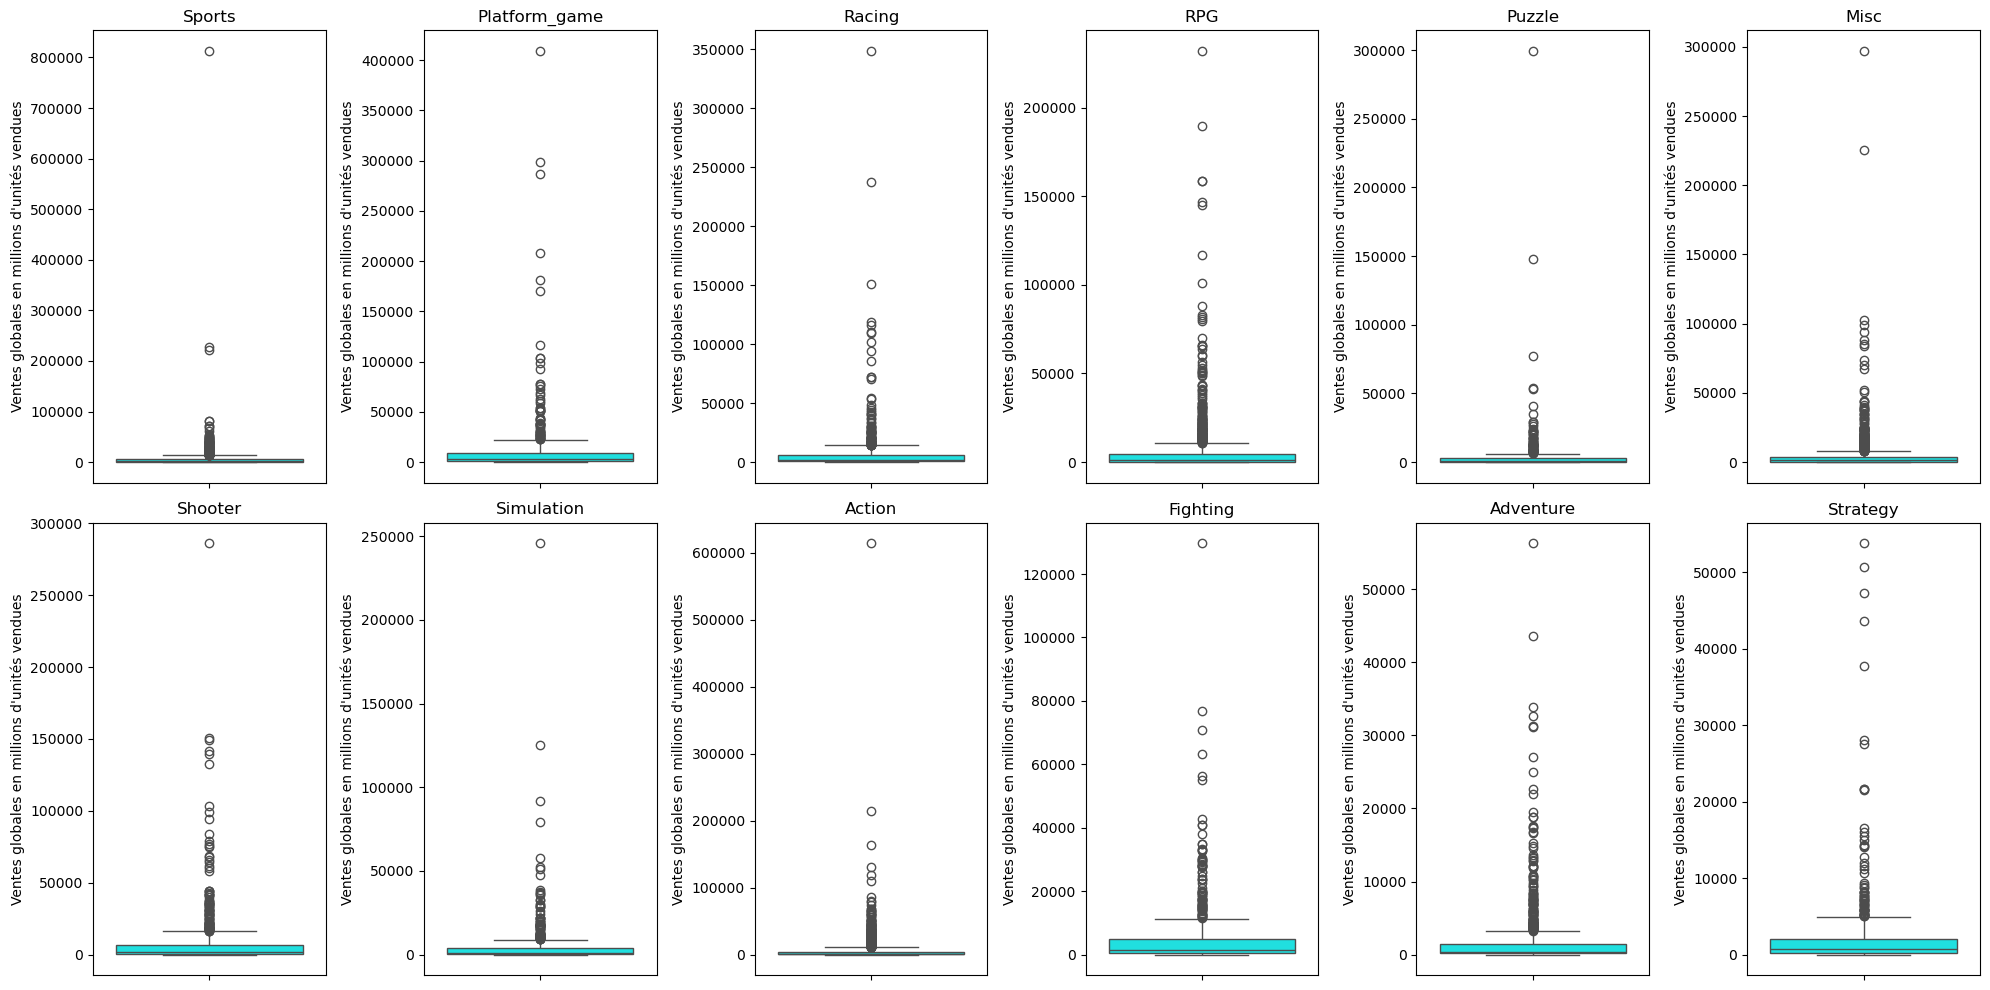

In [112]:
# Configuration de la figure pour 12 boxplots (6 par ligne)
plt.figure(figsize=(20, 10))  # Ajuster la taille globale pour la clarté

# liste des genres uniques
genre = fichier_final['Genre'].unique()

# Boucle sur chaque genre pour créer les boxplots
for i, genre in enumerate(genre, 1):
    plt.subplot(2, 6, i)  # 2 lignes, 6 colonnes, ième graphique
    sns.boxplot(data=fichier_final[fichier_final['Genre'] == genre], 
                y='Vente mondiale', color='aqua')
    plt.title(genre)  # Titre avec le nom du genre
    plt.xlabel('')  # Pas d'étiquette pour l'axe X
    plt.ylabel("Ventes globales en millions d'unités vendues")  # Étiquette de l'axe Y

# Ajuster l'espace entre les graphiques pour éviter les chevauchements
plt.tight_layout()

# Afficher les graphiques
plt.show();

<a class="anchor" id="anal_editeur"></a>
<div style="display: flex; background-color: purple;" >
<h3 style="margin: auto; padding: 15px; color:white; "> Analyse des éditeurs (Publishers) les plus performants </h3>
</div>

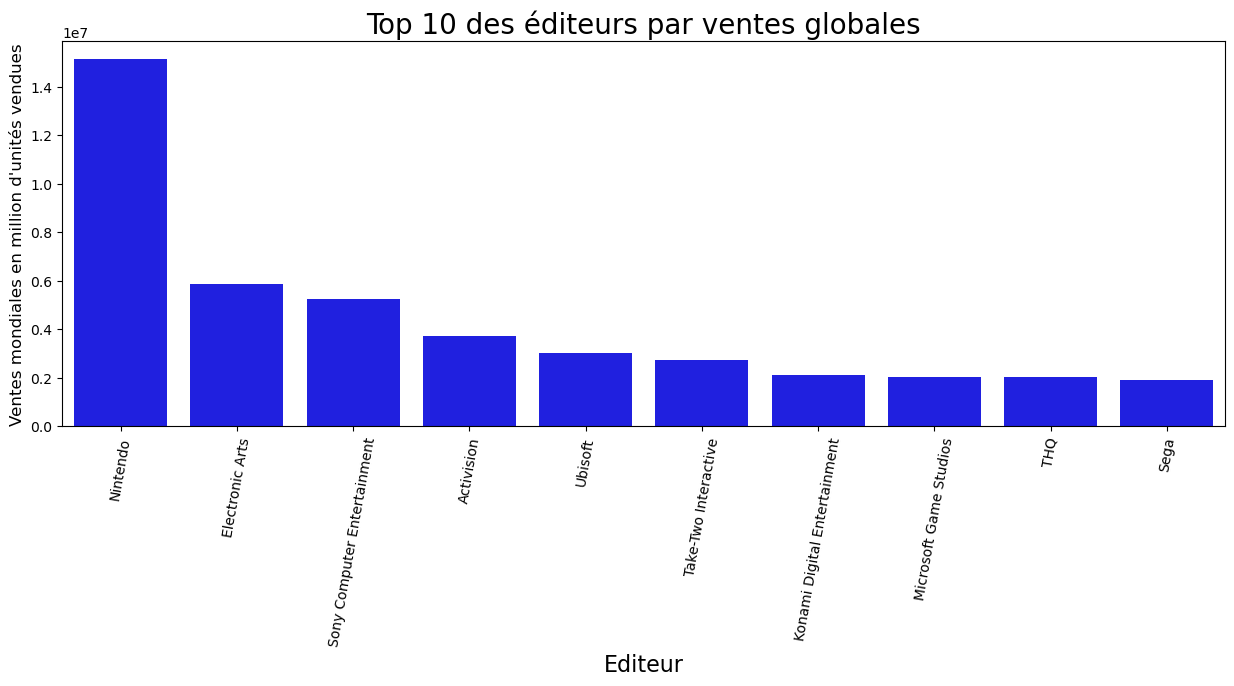

In [114]:
ventes_par_editeur = fichier_final.groupby('Editeur')['Vente mondiale'].sum().reset_index().sort_values(by='Vente mondiale', ascending=False).head(10)

plt.figure(figsize=(15,5))
sns.barplot(x='Editeur', y='Vente mondiale', data=ventes_par_editeur, color='blue')
plt.title("Top 10 des éditeurs par ventes globales",fontsize=20)
plt.xlabel("Editeur",fontsize=16)
plt.ylabel("Ventes mondiales en million d'unités vendues",fontsize=12)
plt.xticks(rotation=80)
plt.show()

<a class="anchor" id="anal_construct"></a>
<div style="display: flex; background-color: purple;" >
<h3 style="margin: auto; padding: 15px; color:white; "> Analyse des constructeurs les plus performants </h3>
</div>

/var/folders/33/vzq1dtn92x30kxs762l39sdm0000gn/T/ipykernel_60775/4164516351.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




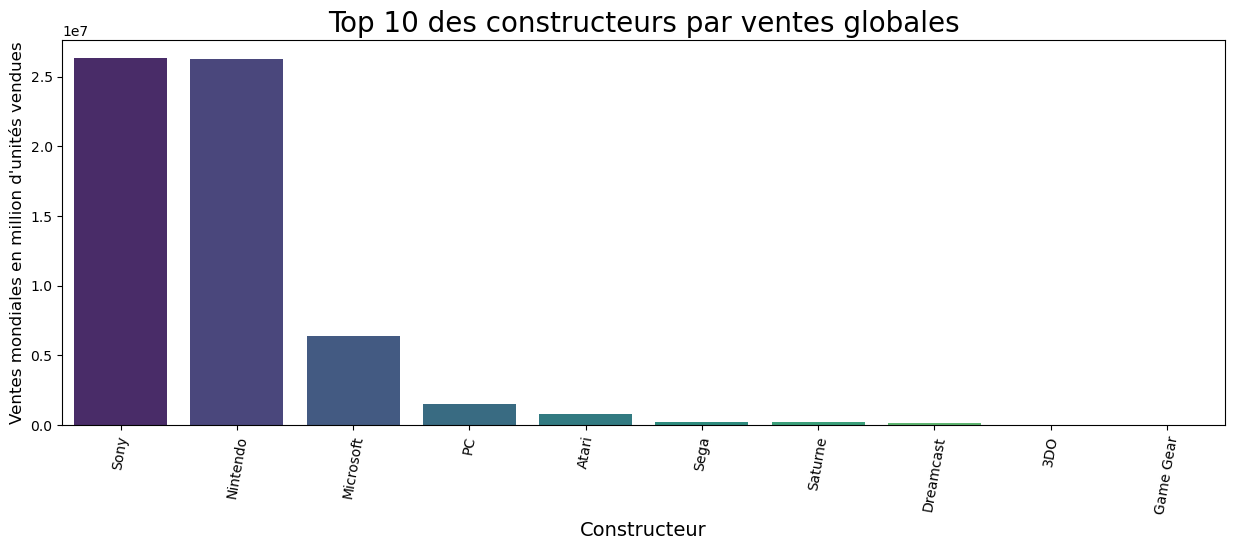

In [116]:
ventes_par_constructeur = fichier_final.groupby('Constructeur')['Vente mondiale'].sum().reset_index().sort_values(by='Vente mondiale', ascending=False)

plt.figure(figsize=(15,5))
sns.barplot(x='Constructeur', y='Vente mondiale', data=ventes_par_constructeur, palette='viridis')
plt.title("Top 10 des constructeurs par ventes globales",fontsize=20)
plt.xlabel("Constructeur",fontsize=14)
plt.ylabel("Ventes mondiales en million d'unités vendues",fontsize=12)
plt.xticks(rotation=80)
plt.show();

<a class="anchor" id="heatmap_genre_console"></a>
<div style="display: flex; background-color: purple;" >
<h3 style="margin: auto; padding: 15px; color:white; "> Heatmap des ventes de jeux par genre et par console </h3>
</div>

In [118]:
ventes_par_genre_et_console = fichier_final.groupby(['Console','Genre'])['Vente mondiale'].sum().reset_index()
ventes_par_genre_et_console.head()

Console       Genre  Vente mondiale
0         3DO   Adventure             606
1         3DO      Puzzle             202
2         3DO  Simulation              21
3  Atari 2600      Action          234601
4  Atari 2600   Adventure           16875

In [119]:
ventes_par_genre_et_console.shape

(275, 3)

In [120]:
top_genres_par_console = ventes_par_genre_et_console.groupby('Console').apply(
    lambda x: x.nlargest(5,'Vente mondiale')
).reset_index(drop=True);

/var/folders/33/vzq1dtn92x30kxs762l39sdm0000gn/T/ipykernel_60775/4274928484.py:1: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



In [121]:
top_genres_par_console

Console       Genre  Vente mondiale
0           3DO   Adventure             606
1           3DO      Puzzle             202
2           3DO  Simulation              21
3    Atari 2600     Shooter          264338
4    Atari 2600      Action          234601
..          ...         ...             ...
119    Xbox One     Shooter          118050
120    Xbox One      Racing           40454
121    Xbox One      Action           35007
122    Xbox One        Misc           20415
123    Xbox One   Adventure           13048

[124 rows x 3 columns]

In [122]:
heatmap_data1 = ventes_par_genre_et_console.pivot(index='Genre',columns='Console', values='Vente mondiale').fillna(0)


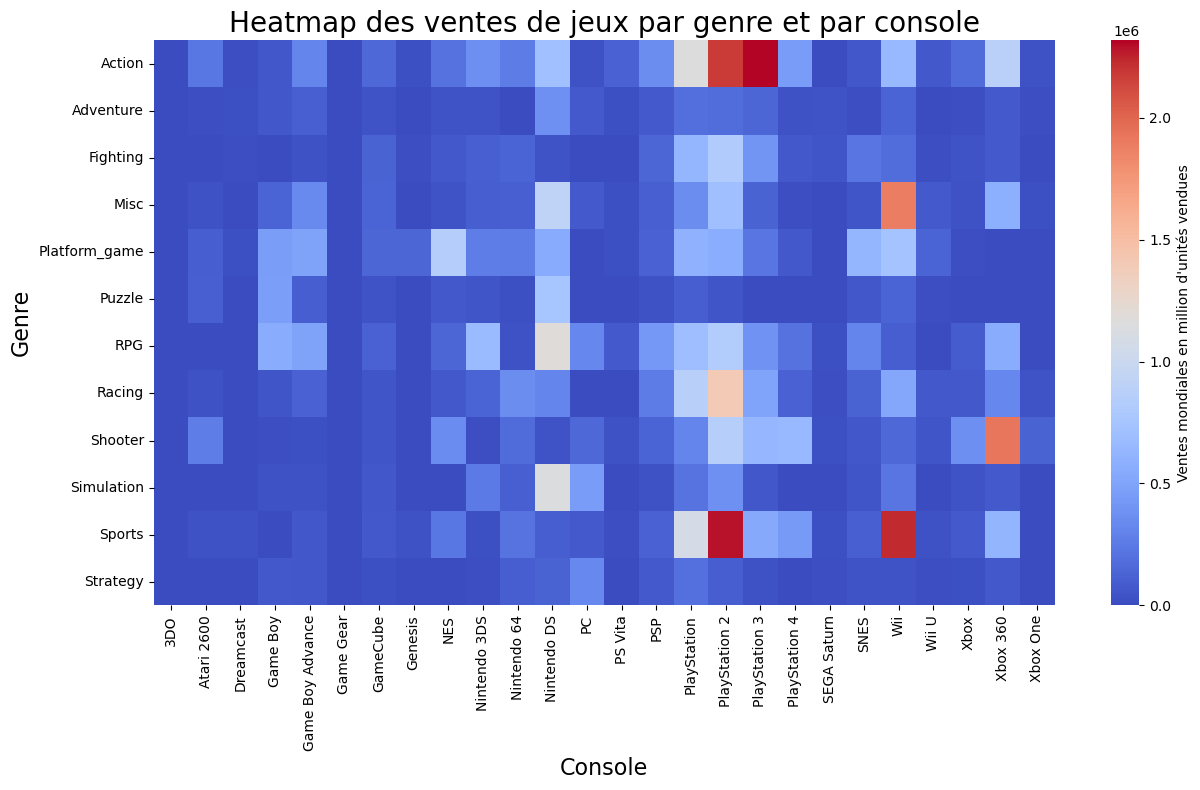

In [123]:
# Heatmap des ventes par genre et par console
plt.figure(figsize=(13, 8))
sns.heatmap(heatmap_data1, cmap="coolwarm", cbar_kws={'label': "Ventes mondiales en million d'unités vendues"})
plt.title("Heatmap des ventes de jeux par genre et par console", fontsize=20)
plt.xlabel("Console", fontsize=16)
plt.ylabel("Genre",fontsize=16)
plt.xticks (rotation=90)
plt.yticks (rotation=0)
plt.tight_layout()
plt.show()

**Cette heatmap nous permet de comprendre quels types de jeux (ou genres de jeux) se vendent le mieux en fonction des consoles sur lesquels ils se jouent.**

<a class="anchor" id="evolution_vente"></a>
<div style="display: flex; background-color: purple;" >
<h3 style="margin: auto; padding: 15px; color:white; "> Évolution des ventes au fil des ans </h3>
</div>

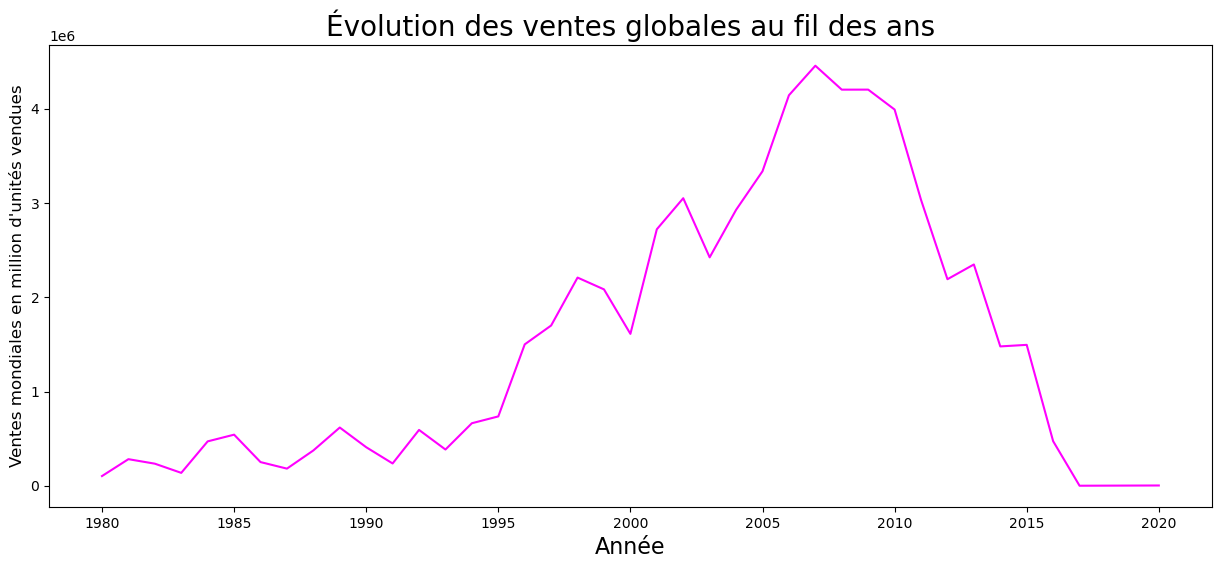

In [126]:
#ventes_de_jeux_par_annee = fichier_final.groupby('Date de sortie du jeu')['Vente mondiale'].sum().reset_index()
#ventes_de_jeux_par_annee.rename(columns={'Vente mondiale':'Vente de jeux'}).head(3)



evolution_ventes = fichier_final.groupby('Date de sortie du jeu')['Vente mondiale'].sum().reset_index()

plt.figure(figsize=(15, 6)) 
sns.lineplot(x='Date de sortie du jeu', y='Vente mondiale', data=evolution_ventes, color = 'magenta')
plt.title("Évolution des ventes globales au fil des ans",fontsize=20)
plt.xlabel("Année",fontsize=16)
plt.ylabel("Ventes mondiales en million d'unités vendues",fontsize=12)
plt.show()

<a class="anchor" id="anal_console"></a>
<div style="display: flex; background-color: purple;" >
<h3 style="margin: auto; padding: 15px; color:white; "> Analyse des performances par plateforme </h3>
</div>

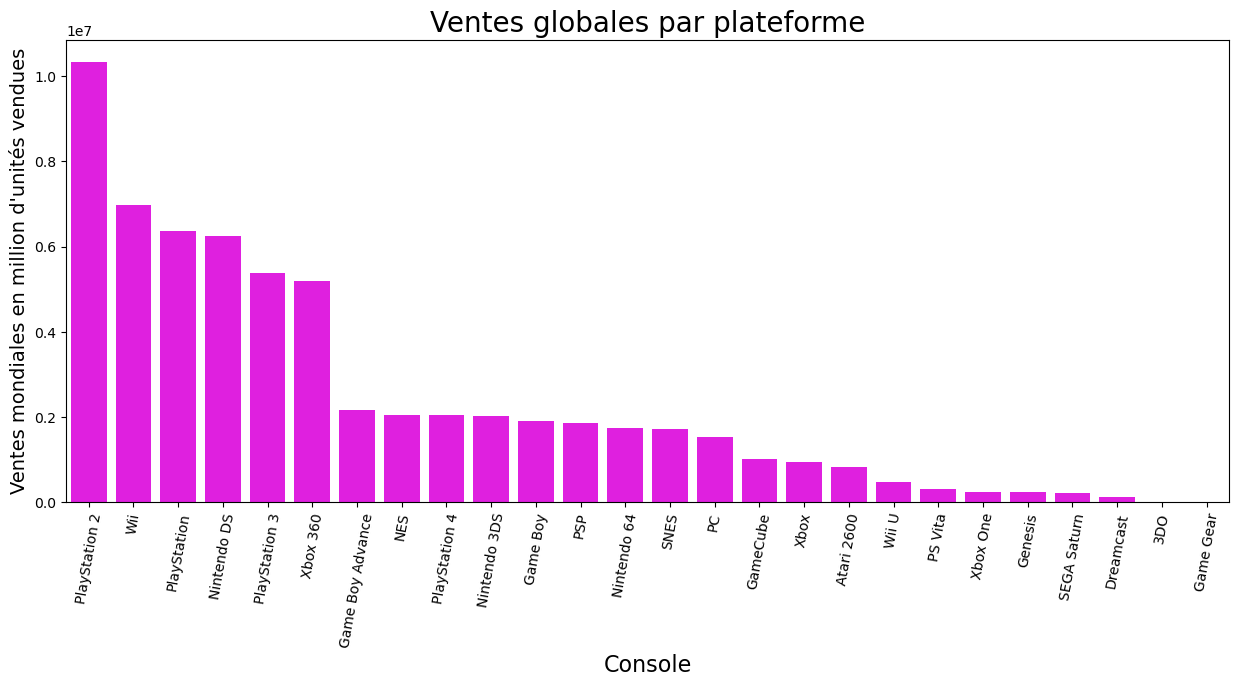

In [128]:
ventes_par_platforme = fichier_final.groupby('Console')['Vente mondiale'].sum().reset_index().sort_values(by='Vente mondiale', ascending=False)

plt.figure(figsize=(15, 6))
sns.barplot(x='Console', y='Vente mondiale', data=ventes_par_platforme, color = 'magenta')
plt.title("Ventes globales par plateforme", fontsize=20)
plt.xlabel("Console",fontsize=16)
plt.ylabel("Ventes mondiales en million d'unités vendues",fontsize=14)
plt.xticks(rotation=80)
plt.show()

In [129]:
vente = ventes_par_platforme['Vente mondiale'].sum()
vente

61809725

In [130]:
ventes_par_platforme

Console  Vente mondiale
16     PlayStation 2        10334146
21               Wii         6973213
15       PlayStation         6373386
11       Nintendo DS         6253760
17     PlayStation 3         5380447
24          Xbox 360         5180937
4   Game Boy Advance         2154156
8                NES         2048255
18     PlayStation 4         2035197
9       Nintendo 3DS         2029563
3           Game Boy         1891848
14               PSP         1857268
10       Nintendo 64         1742249
20              SNES         1715326
12                PC         1525416
6           GameCube          998108
23              Xbox          936023
1         Atari 2600          816857
22             Wii U          462677
13           PS Vita          313791
25          Xbox One          241575
7            Genesis          226782
19       SEGA Saturn          200969
2          Dreamcast          116905
0                3DO             829
5          Game Gear              42

<a class="anchor" id="heatmap_console_region"></a>
<div style="display: flex; background-color: purple;" >
<h3 style="margin: auto; padding: 15px; color:white; "> Heatmap des ventes de jeux par Console et par région </h3>
</div>

In [132]:
# Groupement par 'Console' et somme des ventes de jeux vendus par région

ventes_par_console_et_region = fichier_final.groupby('Console').agg({
    'Vente Amérique du Nord': 'sum',
    'Vente Europe': 'sum',
    'Vente Japon': 'sum',
    'Vente autres régions': 'sum'
}).reset_index()

ventes_par_console_et_region = pd.DataFrame (ventes_par_console_et_region)

In [133]:
print(ventes_par_console_et_region.dtypes)

Console                   object
Vente Amérique du Nord     int64
Vente Europe               int64
Vente Japon                int64
Vente autres régions       int64
dtype: object


In [134]:
# Préparation des données pour la heatmap

heatmap_data2 = ventes_par_console_et_region.set_index('Console')
print(heatmap_data2.head())  # Vérification finale

                  Vente Amérique du Nord  Vente Europe  Vente Japon  \
Console                                                               
3DO                                    0             0          829   
Atari 2600                        596479         35690            0   
Dreamcast                          38153          9507        59714   
Game Boy                          480733        422510       567734   
Game Boy Advance                  951015        422159       318086   

                  Vente autres régions  
Console                                 
3DO                                  0  
Atari 2600                        6902  
Dreamcast                         1881  
Game Boy                         43510  
Game Boy Advance                 40958  


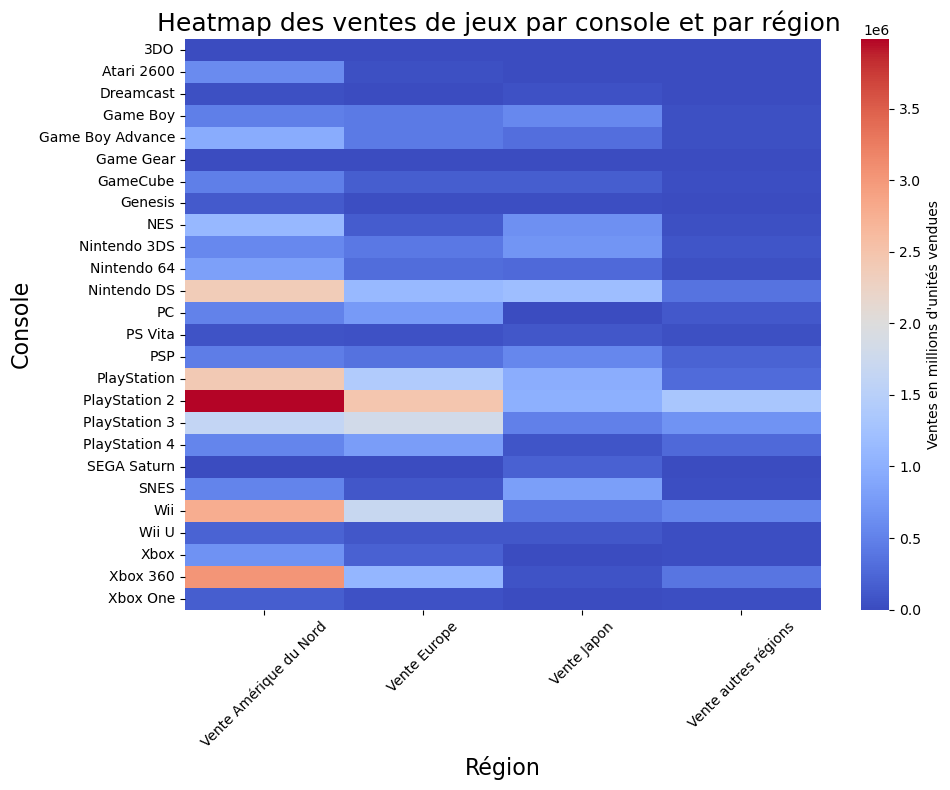

In [135]:
# Heatmap des ventes par console et par région
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data2, cmap="coolwarm", cbar_kws={'label': "Ventes en millions d'unités vendues"})
plt.title("Heatmap des ventes de jeux par console et par région ", fontsize=18)
plt.xlabel("Région", fontsize=16)
plt.ylabel("Console",fontsize=16)
plt.xticks (rotation=45)
plt.yticks (rotation=0)
plt.tight_layout()
plt.show()

**Cette heatmap nous permet de comprendre sur quelles consoles et dans quelles régions les ventes de jeux sont les plus importantes.**

<a class="anchor" id="part_marche_constr"></a>
<div style="display: flex; background-color: purple;" >
<h3 style="margin: auto; padding: 15px; color:white; "> Part de marché par constructeur </h3>
</div>

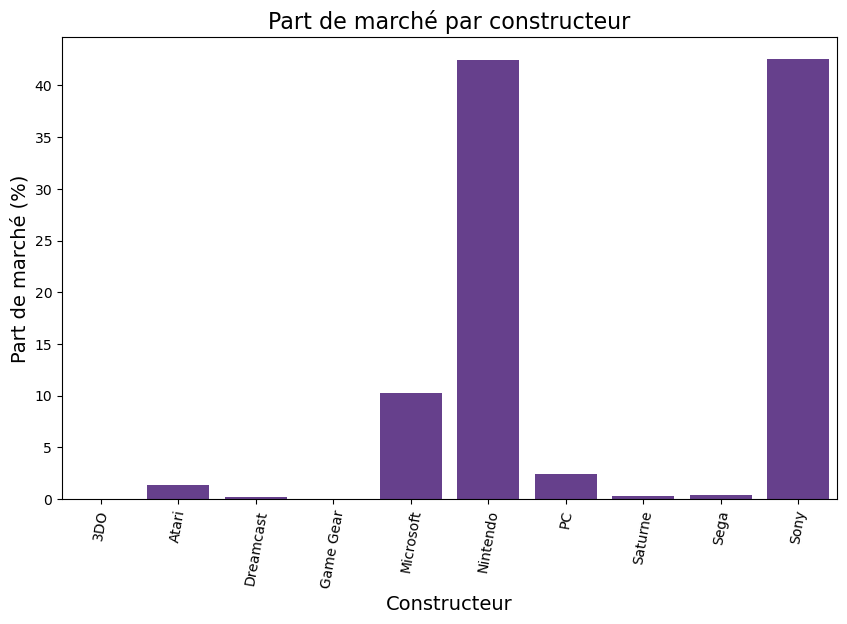

In [138]:
# Somme des ventes par constructeur
ventes_par_constructeur = fichier_final.groupby('Constructeur')['Vente mondiale'].sum()

# Part de marché par constructeur
part_marche_constructeur = ventes_par_constructeur / ventes_par_constructeur.sum() * 100


# Visualisation
plt.figure(figsize=(10, 6))
sns.barplot(x=part_marche_constructeur.index, y=part_marche_constructeur.values, color = 'rebeccapurple')
plt.title("Part de marché par constructeur", fontsize = 16)
plt.ylabel("Part de marché (%)",fontsize = 14)
plt.xlabel("Constructeur",fontsize = 14)
plt.xticks(rotation=80)
plt.show();

<a class="anchor" id="stat_note"></a>
<div style="display: flex; background-color: magenta;" >
<h2 style="margin: auto; padding: 15px; color:white; "> Statistiques des notes </h2>
</div>

**Note : Nous travaillons sur un sous-ensemble du dataframe complet auquel nous avons retiré tous les jeux non-notés (colonne 'nombre de note'=0) afin de ne pas biaiser les statistiques.**

In [141]:
# Dataframe des notes
stat_notes = fichier_final[['Note moyenne','Nombre de note']]
stat_notes

Note moyenne  Nombre de note
0          4.190000       174.00000
1          1.431897        63.98757
2          4.260000       204.00000
3          4.170000        89.00000
4          1.431897        63.98757
...             ...             ...
11455      0.000000         0.00000
11456      1.431897        63.98757
11457      0.000000         2.00000
11458      1.431897        63.98757
11459      1.431897        63.98757

[11460 rows x 2 columns]

In [142]:
# Dataframe du nombre de jeu non noté (valeur 'Nombre de note' = 0)
Nb_jeu_non_note = stat_notes[stat_notes['Nombre de note']==0]
Nb_jeu_non_note.head(2)

Note moyenne  Nombre de note
9             0.0             0.0
225           0.0             0.0

In [143]:
Nb_jeu_non_note.shape

(1671, 2)

In [144]:
Nb_jeu_non_note['Nombre de note'].value_counts().sum()

1671

In [145]:

# Suppression des lignes où la valeur de 'Nombre de note' est égale à 0
stat_notes = stat_notes[stat_notes['Nombre de note'] != 0]

In [146]:
stat_notes_sans_moyenne_nulle_cause_nb_note_nul = stat_notes
stat_notes_sans_moyenne_nulle_cause_nb_note_nul

Note moyenne  Nombre de note
0          4.190000       174.00000
1          1.431897        63.98757
2          4.260000       204.00000
3          4.170000        89.00000
4          1.431897        63.98757
...             ...             ...
11454      1.431897        63.98757
11456      1.431897        63.98757
11457      0.000000         2.00000
11458      1.431897        63.98757
11459      1.431897        63.98757

[9789 rows x 2 columns]

In [147]:
stat_notes_sans_moyenne_nulle_cause_nb_note_nul.shape

(9789, 2)

In [148]:
stat_notes_sans_moyenne_nulle_cause_nb_note_nul.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9789 entries, 0 to 11459
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Note moyenne    9789 non-null   float64
 1   Nombre de note  9789 non-null   float64
dtypes: float64(2)
memory usage: 229.4 KB


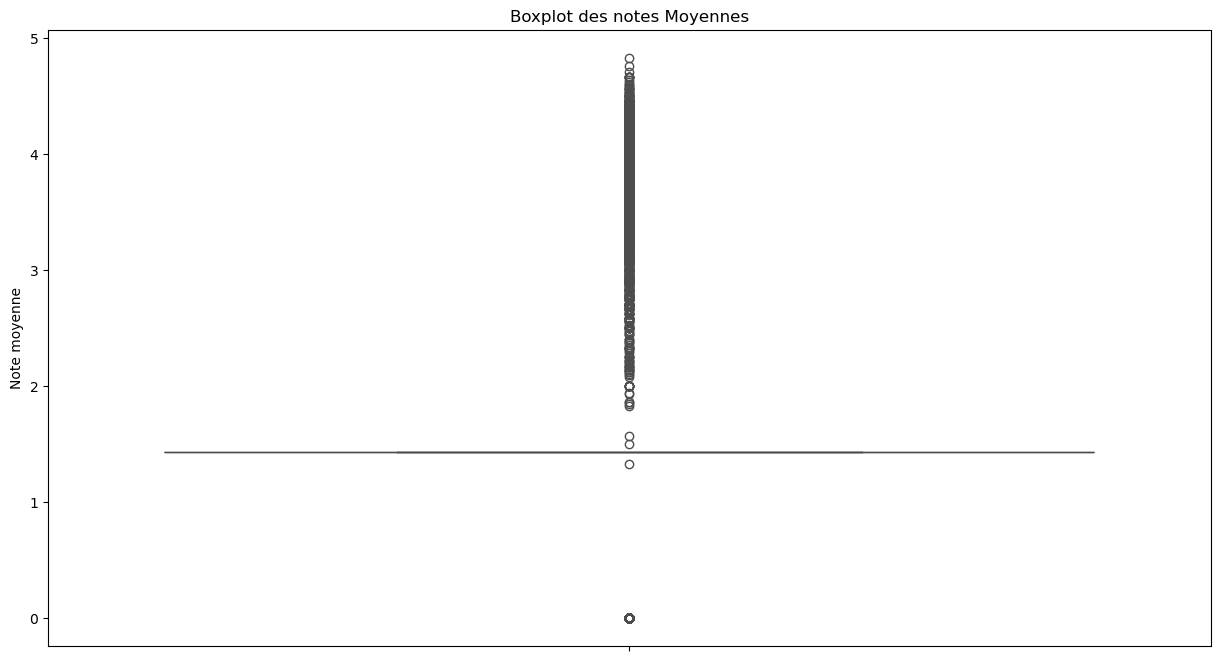

In [149]:
# Config de la figure
plt.figure(figsize=(15, 8))

# Boxplot pour les notes moyennes
sns.boxplot(y=stat_notes_sans_moyenne_nulle_cause_nb_note_nul['Note moyenne'], color='yellow')
plt.title('Boxplot des notes Moyennes')
plt.ylabel('Note moyenne')
plt.show();

In [150]:
stat_notes.describe()

Note moyenne  Nombre de note
count   9789.000000     9789.000000
mean       1.676324       74.910364
std        1.147187      171.069116
min        0.000000        1.000000
25%        1.431897       41.000000
50%        1.431897       63.987570
75%        1.431897       63.987570
max        4.830000     4289.000000

 **=>  La note moyenne la plus haute de l'échantillon est 4.83 / 5.**

In [152]:
jeu_note_la_plus_haute = fichier_final[fichier_final['Note moyenne']==4.83]
jeu_note_la_plus_haute

Nom du jeu           Console  Date de sortie du jeu  \
7783  Astro Boy: Omega Factor  Game Boy Advance                   2003   

       Genre Editeur Constructeur Console portable  Vente Amérique du Nord  \
7783  Action     THQ     Nintendo              Oui                     606   

      Vente Europe  Vente Japon  Vente autres régions  Vente mondiale  \
7783           206            0                     0             812   

      Note moyenne  Note la plus haute  Nombre de note         Développeur  \
7783          4.83                 5.0             6.0  Hitmaker||Treasure   

     Esrb_rating  Date de Sortie de la console  Vente de console (en million)  
7783     Inconnu                          2001                        78.2496

 **=>  La note moyenne la plus haute est obtenu par le jeu *Astro Boy: Omega Factor* sorti en 2003 sur Game Boy Advance.**

<a class="anchor" id="note_moy_genre"></a>
<div style="display: flex; background-color: purple;" >
<h4 style="margin: auto; padding: 15px; color:white; "> Notes moyennes des jeux par genre </h4>
</div>

In [155]:
stat_notes1 = fichier_final[['Genre','Note moyenne','Nombre de note']]
stat_notes1

Genre  Note moyenne  Nombre de note
0             Sports      4.190000       174.00000
1      Platform_game      1.431897        63.98757
2             Racing      4.260000       204.00000
3             Sports      4.170000        89.00000
4                RPG      1.431897        63.98757
...              ...           ...             ...
11455         Puzzle      0.000000         0.00000
11456           Misc      1.431897        63.98757
11457      Adventure      0.000000         2.00000
11458         Puzzle      1.431897        63.98757
11459         Action      1.431897        63.98757

[11460 rows x 3 columns]

In [156]:
# Dataframe du nombre de jeu non noté (valeur 'Nombre de note' = 0)
Nb_jeu_non_note1 = stat_notes1[stat_notes1['Nombre de note']==0]
Nb_jeu_non_note1.head(2)

Genre  Note moyenne  Nombre de note
9    Shooter           0.0             0.0
225   Sports           0.0             0.0

In [157]:
# Suppression des lignes où la valeur de 'Nombre de note' est égale à 0
stat_notes1 = stat_notes1[stat_notes1['Nombre de note'] != 0]

In [158]:
stat_notes_sans_moyenne_nulle_cause_nb_note_nul1 = stat_notes1
stat_notes_sans_moyenne_nulle_cause_nb_note_nul1

Genre  Note moyenne  Nombre de note
0             Sports      4.190000       174.00000
1      Platform_game      1.431897        63.98757
2             Racing      4.260000       204.00000
3             Sports      4.170000        89.00000
4                RPG      1.431897        63.98757
...              ...           ...             ...
11454       Strategy      1.431897        63.98757
11456           Misc      1.431897        63.98757
11457      Adventure      0.000000         2.00000
11458         Puzzle      1.431897        63.98757
11459         Action      1.431897        63.98757

[9789 rows x 3 columns]

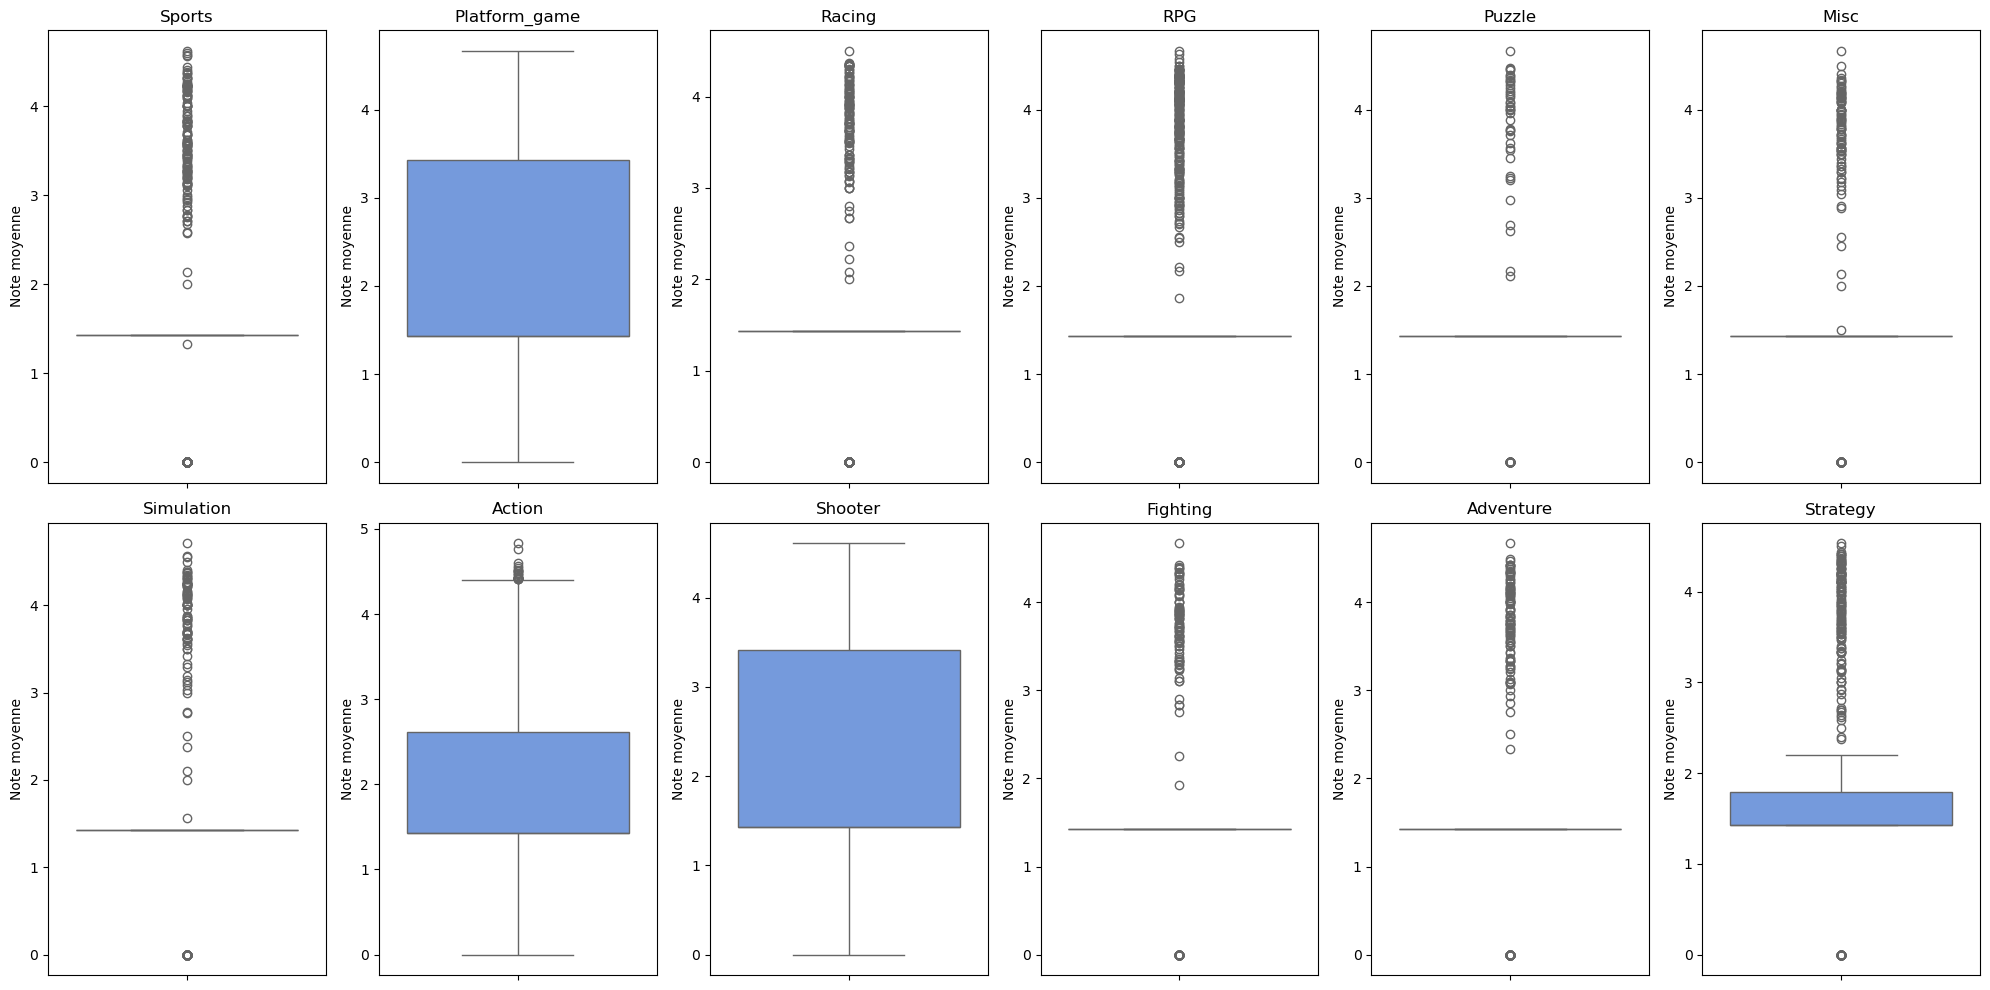

In [159]:
# Config de la figure pour 12 boxplots (6 par ligne)
plt.figure(figsize=(20, 10))  # Ajustement de la taille globale pour la clarté

# liste des genres uniques
genre = stat_notes_sans_moyenne_nulle_cause_nb_note_nul1['Genre'].unique()

# Boucle sur chaque genre pour créer les boxplots
for i, genre in enumerate(genre, 1):
    plt.subplot(2, 6, i)  # 2 lignes, 6 colonnes, ième graphique
    sns.boxplot(data=stat_notes_sans_moyenne_nulle_cause_nb_note_nul1[stat_notes_sans_moyenne_nulle_cause_nb_note_nul1['Genre'] == genre], 
                y='Note moyenne', color='cornflowerblue')
    plt.title(genre)  
    plt.xlabel('')  
    plt.ylabel('Note moyenne')  # Étiquette de l'axe Y

# espace entre les graphiques pour éviter les chevauchements
plt.tight_layout()
plt.show();

<a class="anchor" id="note_moy_consol"></a>
<div style="display: flex; background-color: purple;" >
<h4 style="margin: auto; padding: 15px; color:white; "> Notes des jeux sur console </h4>
</div>

In [161]:
stat_notes2 = fichier_final[['Console','Note moyenne','Nombre de note']]
stat_notes2

Console  Note moyenne  Nombre de note
0               Wii      4.190000       174.00000
1               NES      1.431897        63.98757
2               Wii      4.260000       204.00000
3               Wii      4.170000        89.00000
4          Game Boy      1.431897        63.98757
...             ...           ...             ...
11455  Nintendo 3DS      0.000000         0.00000
11456            PC      1.431897        63.98757
11457            PC      0.000000         2.00000
11458            PC      1.431897        63.98757
11459   Nintendo 64      1.431897        63.98757

[11460 rows x 3 columns]

In [162]:
# Dataframe du nombre de jeu non noté (valeur 'Nombre de note' = 0)
Nb_jeu_non_note2 = stat_notes2[stat_notes2['Nombre de note']==0]
Nb_jeu_non_note2.head(2)

Console  Note moyenne  Nombre de note
9              NES           0.0             0.0
225  PlayStation 2           0.0             0.0

In [163]:
# Suppression des lignes où la valeur de 'Nombre de note' est égale à 0
stat_notes2 = stat_notes2[stat_notes2['Nombre de note'] != 0]

stat_notes_sans_moyenne_nulle_cause_nb_note_nul2 = stat_notes2
stat_notes_sans_moyenne_nulle_cause_nb_note_nul2.shape

(9789, 3)

In [164]:
#note_moy_par_console = stat_notes_sans_moyenne_nulle_cause_nb_note_nul2.groupby('Console')[['Note moyenne']].mean().reset_index().sort_values(by='Note moyenne', ascending=False).head(10)
#note_moy_par_console

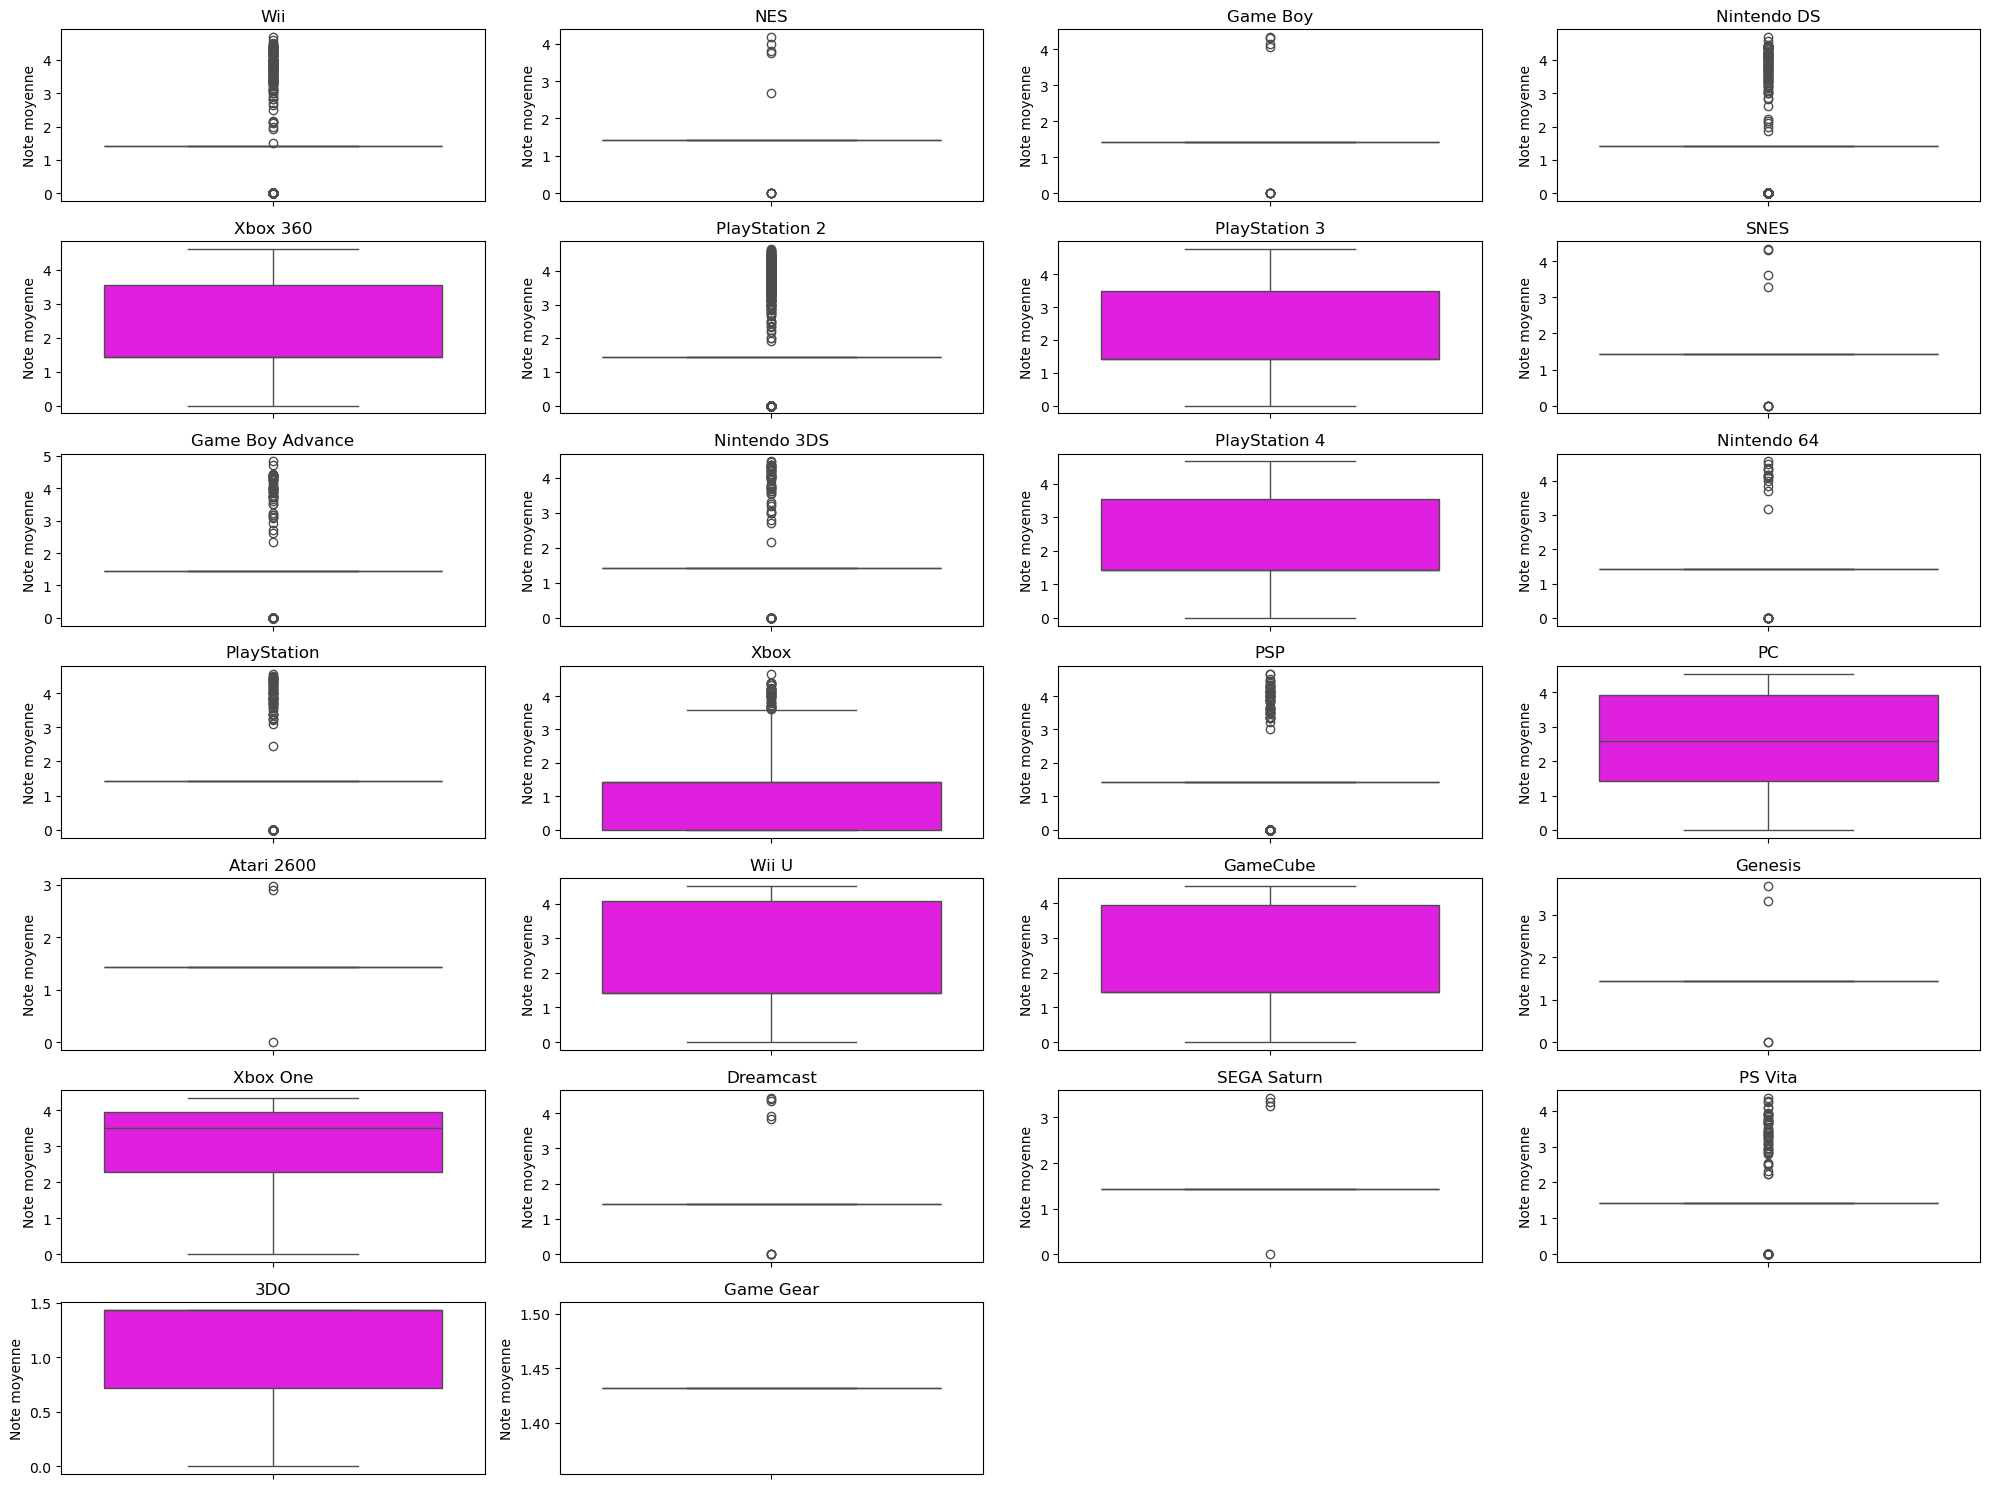

In [165]:
# Config de la figure pour 26 boxplots (4 par ligne)
plt.figure(figsize=(20, 15))  

# Obtenir la liste des consoles uniques
console = stat_notes_sans_moyenne_nulle_cause_nb_note_nul2['Console'].unique()

# Boucle sur chaque genre pour créer les boxplots
for i, console in enumerate(console, 1):
    plt.subplot(7, 4, i)  # 7 lignes, 4 colonnes, ième graphique
    sns.boxplot(data=stat_notes_sans_moyenne_nulle_cause_nb_note_nul2[stat_notes_sans_moyenne_nulle_cause_nb_note_nul2['Console'] == console], 
                y='Note moyenne', color='fuchsia')
    plt.title(console)  
    plt.xlabel('')  
    plt.ylabel('Note moyenne')  # Étiquette de l'axe Y

# espace entre les graphiques pour éviter les chevauchements
plt.tight_layout()
plt.show();

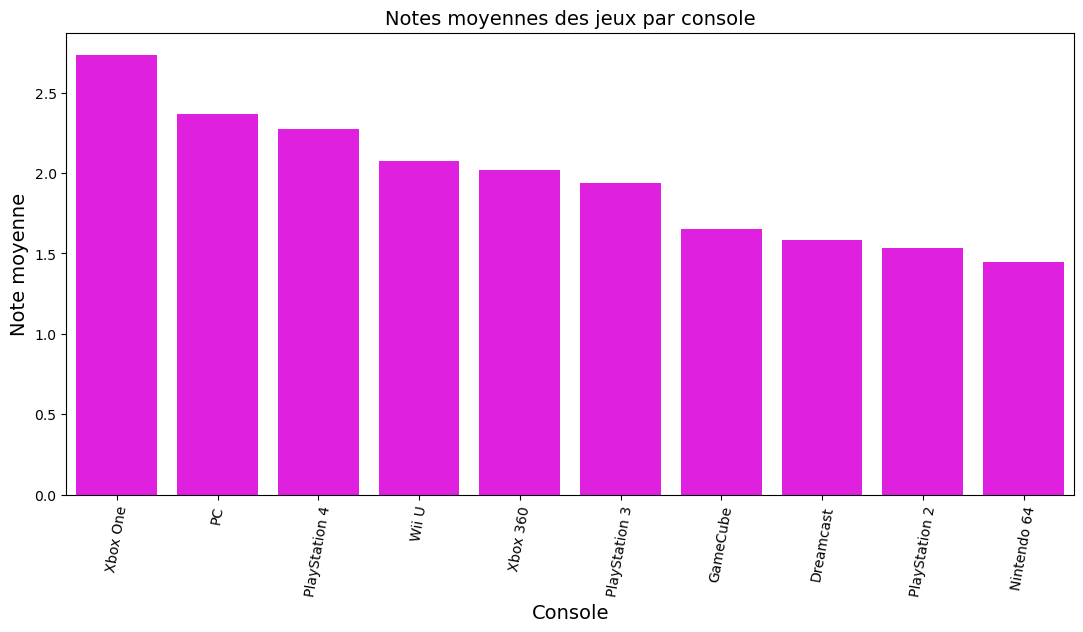

In [166]:
note_moy_par_console = fichier_final.groupby('Console')[['Note moyenne']].mean().reset_index().sort_values(by='Note moyenne', ascending=False).head(10)

plt.figure(figsize=(13,6))

sns.barplot(x='Console', y='Note moyenne', data=note_moy_par_console, color='fuchsia')
plt.title("Notes moyennes des jeux par console",fontsize=14)
plt.xlabel("Console",fontsize=14)
plt.ylabel("Note moyenne",fontsize=14)
plt.xticks(rotation=80)
plt.show();

<a class="anchor" id="note_moy_constr"></a>
<div style="display: flex; background-color: purple;" >
<h4 style="margin: auto; padding: 15px; color:white; "> Notes des jeux par constructeur </h4>
</div>

In [168]:
stat_notes3 = fichier_final[['Constructeur','Note moyenne','Nombre de note']]

# Dataframe du nombre de jeu non noté (valeur 'Nombre de note' = 0)
Nb_jeu_non_note3 = stat_notes3[stat_notes3['Nombre de note']==0]

# Suppression des lignes où la valeur de 'Nombre de note' est égale à 0
stat_notes3 = stat_notes3[stat_notes3['Nombre de note'] != 0]

stat_notes_sans_moyenne_nulle_cause_nb_note_nul3 = stat_notes3
stat_notes_sans_moyenne_nulle_cause_nb_note_nul3.shape

(9789, 3)

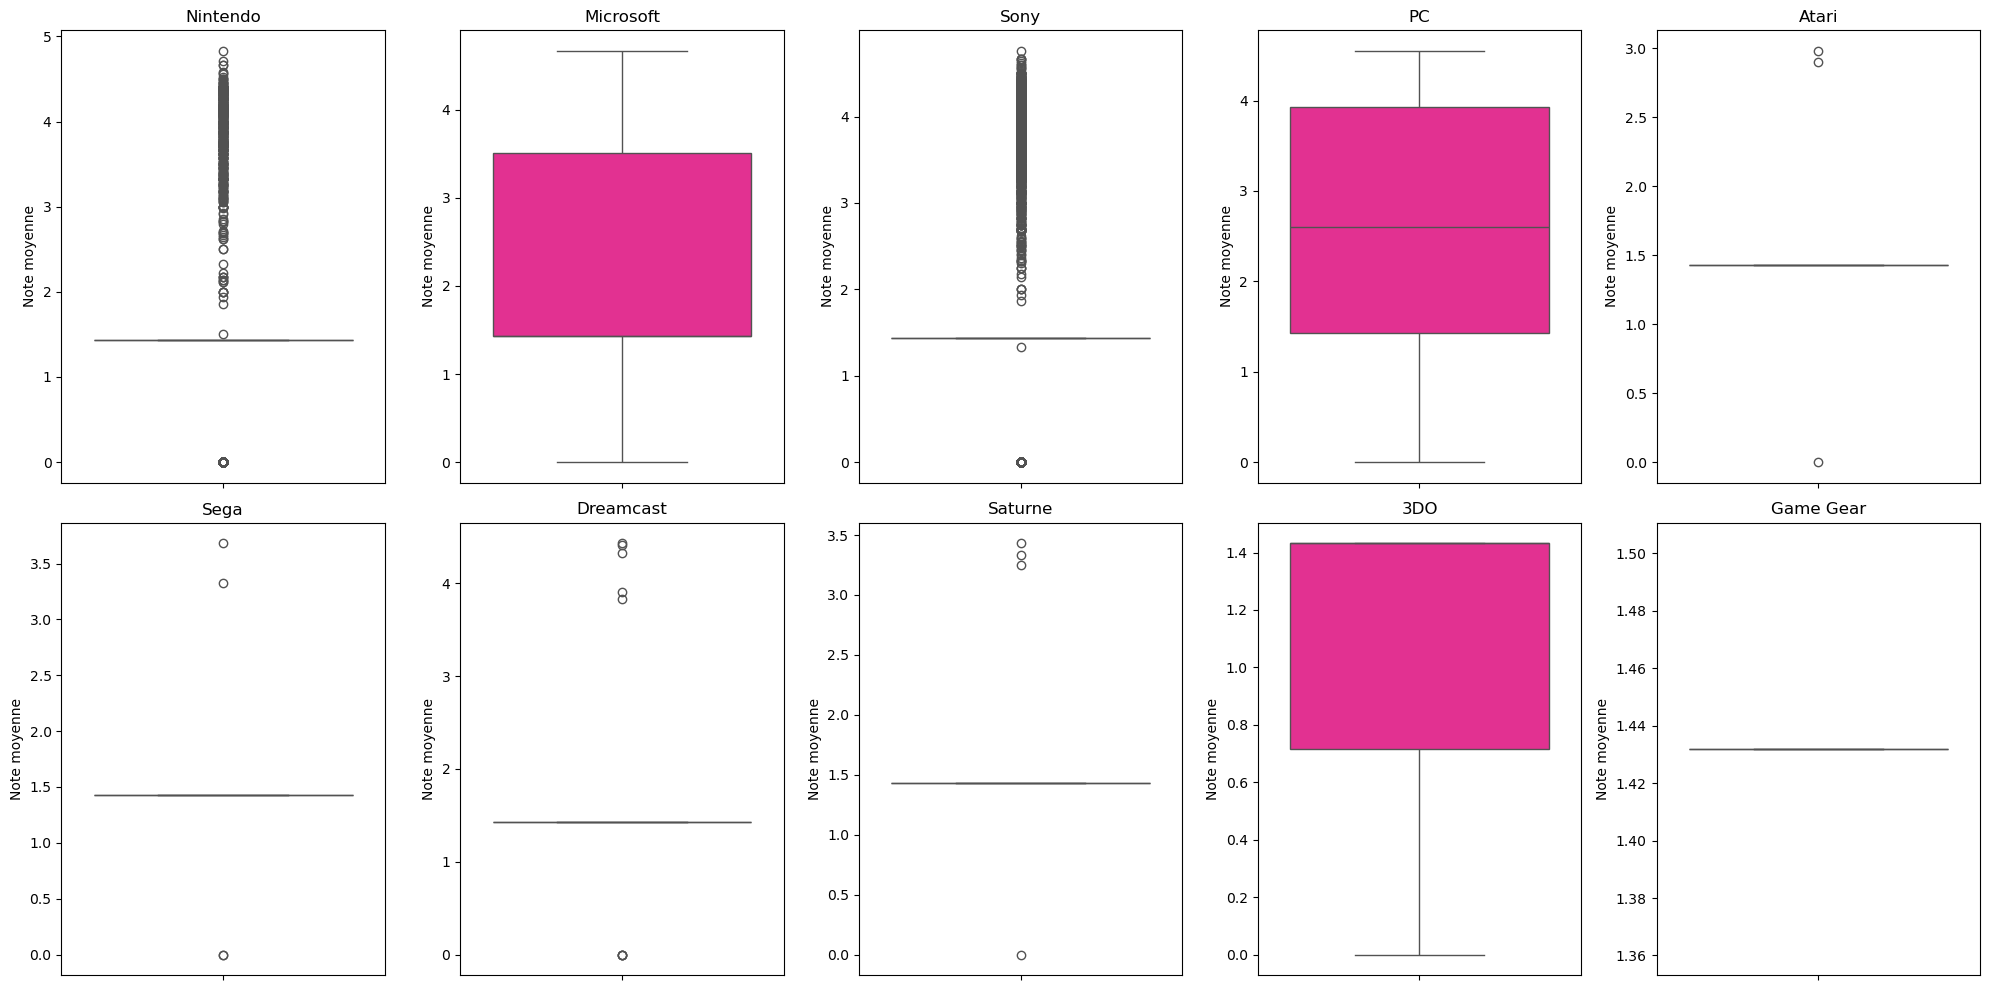

In [169]:
# Config de la figure pour 10 boxplots (5 par ligne)
plt.figure(figsize=(20, 10))  

# Liste des constructeur uniques
constructeur = stat_notes_sans_moyenne_nulle_cause_nb_note_nul3['Constructeur'].unique()

# Boucle sur chaque genre pour créer les boxplots
for i, constructeur in enumerate(constructeur, 1):
    plt.subplot(2, 5, i)  # 2 lignes, 6 colonnes, ième graphique
    sns.boxplot(data=stat_notes_sans_moyenne_nulle_cause_nb_note_nul3[stat_notes_sans_moyenne_nulle_cause_nb_note_nul3['Constructeur'] == constructeur], 
                y='Note moyenne', color='deeppink')
    plt.title(constructeur)  
    plt.xlabel('')  # Pas d'étiquette pour l'axe X
    plt.ylabel('Note moyenne')  # Étiquette de l'axe Y

# espace entre les graphiques pour éviter les chevauchements
plt.tight_layout()
plt.show();

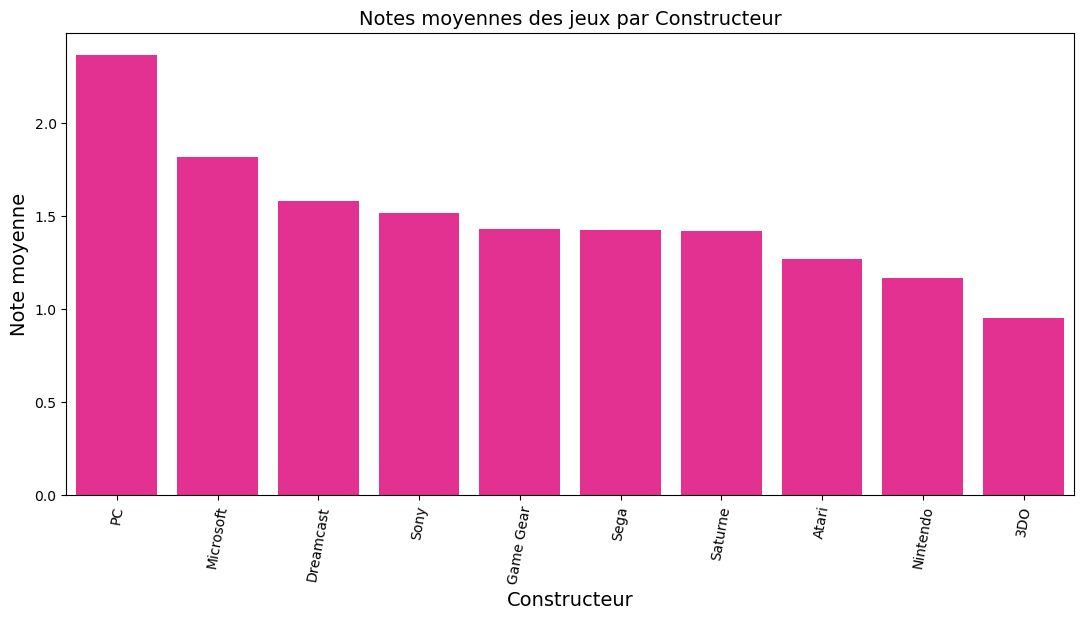

In [170]:
note_moy_par_constructeur = fichier_final.groupby('Constructeur')[['Note moyenne']].mean().reset_index().sort_values(by='Note moyenne', ascending=False)
plt.figure(figsize=(13,6))

sns.barplot(x='Constructeur', y='Note moyenne', data=note_moy_par_constructeur, color='deeppink')
plt.title("Notes moyennes des jeux par Constructeur",fontsize=14)
plt.xlabel("Constructeur",fontsize=14)
plt.ylabel("Note moyenne",fontsize=14)
plt.xticks(rotation=80)
plt.show();

<a class="anchor" id="note_moy_esrb"></a>
<div style="display: flex; background-color: purple;" >
<h4 style="margin: auto; padding: 15px; color:white; "> Moyenne des notes par catégorie Esrb_rating </h4>
</div>

In [172]:
# Dataframe sans moyenne à 0 pour cause de nb de note à 0
stat_notes4 = fichier_final[['Esrb_rating','Note moyenne','Nombre de note']]

# Dataframe du nombre de jeu non noté (valeur 'Nombre de note' = 0)
Nb_jeu_non_note4 = stat_notes4[stat_notes4['Nombre de note']==0]

# Suppression des lignes où la valeur de 'Nombre de note' est égale à 0
stat_notes4 = stat_notes4[stat_notes4['Nombre de note'] != 0]

stat_notes_sans_moyenne_nulle_cause_nb_note_nul4 = stat_notes4
stat_notes_sans_moyenne_nulle_cause_nb_note_nul4.shape

(9789, 3)

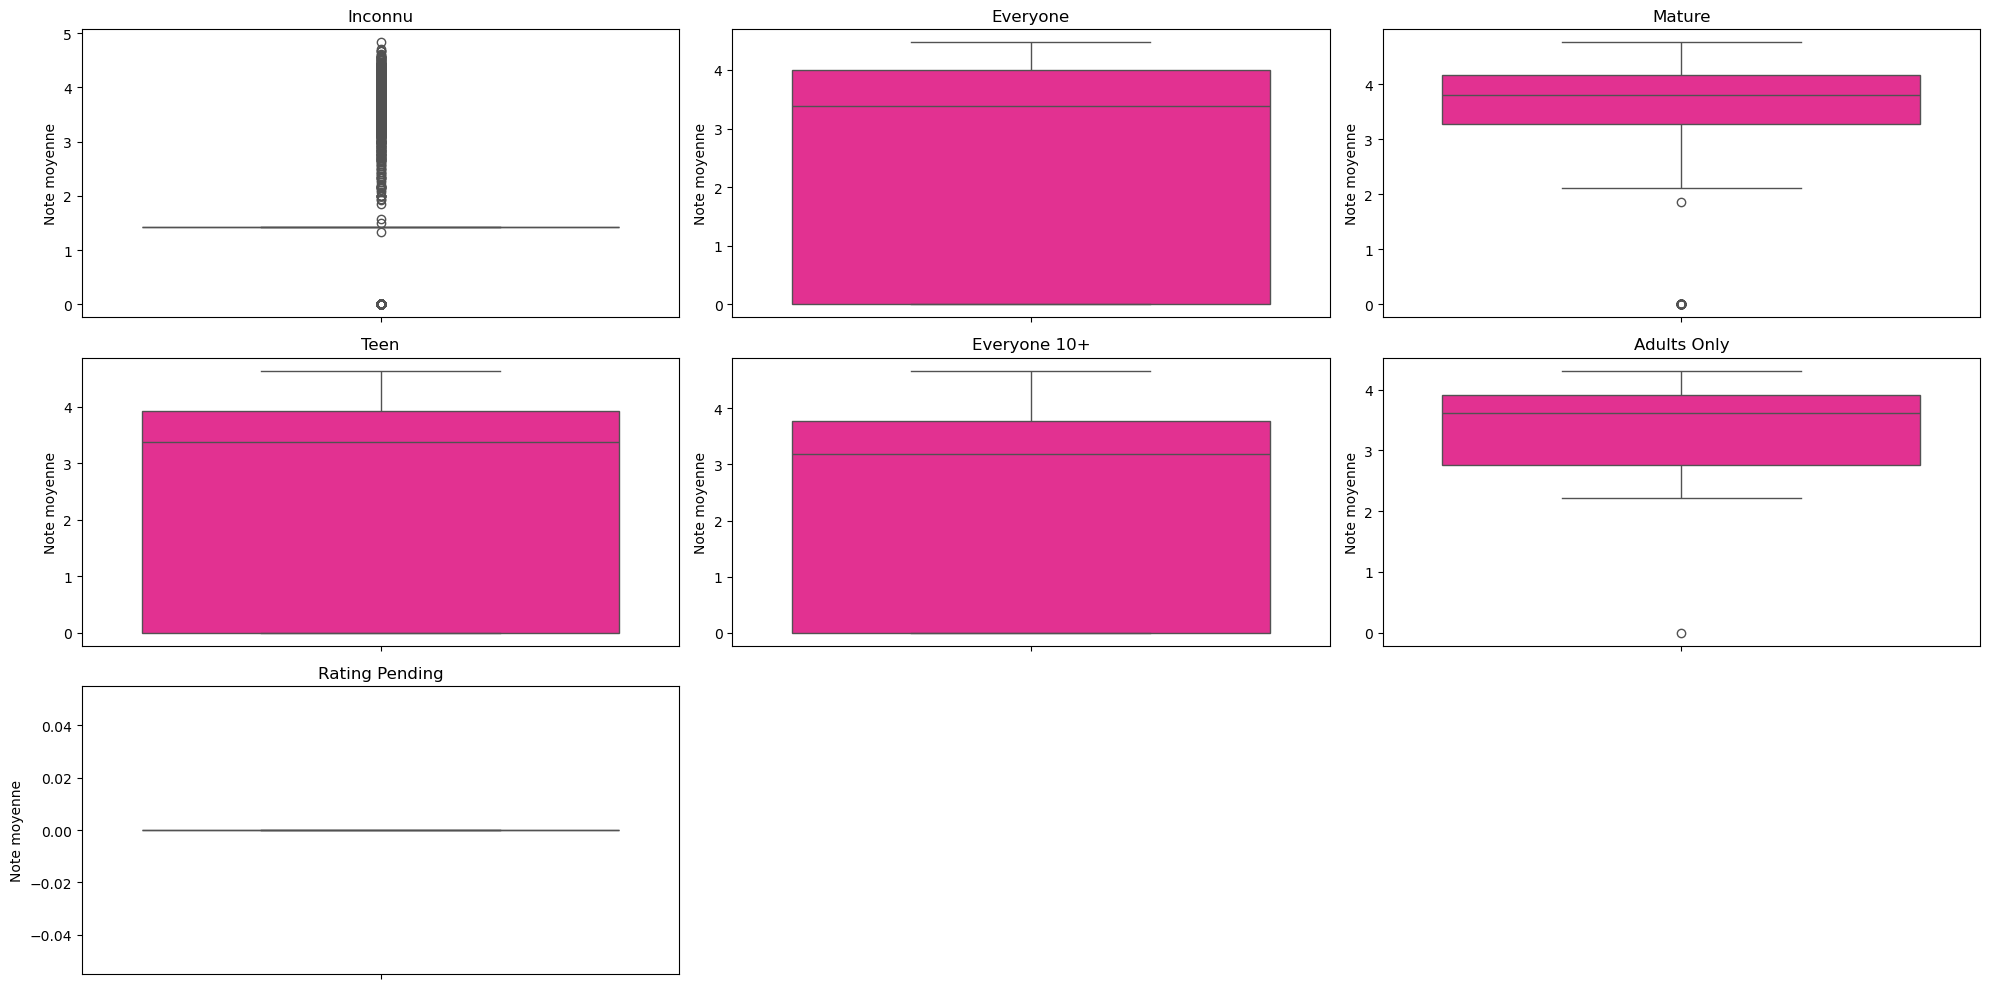

In [173]:
# Config de la figure pour 7 boxplots (3 par ligne)
plt.figure(figsize=(20, 10))  

# Obtenir la liste des genres uniques
esrb_rating = stat_notes_sans_moyenne_nulle_cause_nb_note_nul4['Esrb_rating'].unique()

# Boucle sur chaque esrb_rating pour créer les boxplots
for i, esrb_rating in enumerate(esrb_rating, 1):
    plt.subplot(3, 3, i)  # 3 lignes, 3 colonnes, ième graphique
    sns.boxplot(data=stat_notes_sans_moyenne_nulle_cause_nb_note_nul4[stat_notes_sans_moyenne_nulle_cause_nb_note_nul4['Esrb_rating'] == esrb_rating], 
                y='Note moyenne', color='deeppink')
    plt.title(esrb_rating)  
    plt.xlabel('')  # Pas d'étiquette pour l'axe X
    plt.ylabel('Note moyenne')  # Étiquette de l'axe Y

plt.tight_layout()
plt.show();

In [174]:
# Calcul de la moyenne des notes par Esrb_rating
moyenne_notes_par_esrb = fichier_final.groupby('Esrb_rating')['Note moyenne'].mean().reset_index()

# Renommage colonne
moyenne_notes_par_esrb.columns = ['Esrb_rating', 'Moyenne des notes']

moyenne_notes_par_esrb

Esrb_rating  Moyenne des notes
0     Adults Only           3.316333
1        Everyone           2.141847
2    Everyone 10+           1.923767
3         Inconnu           1.273576
4          Mature           3.276484
5  Rating Pending           0.000000
6            Teen           2.319183

/var/folders/33/vzq1dtn92x30kxs762l39sdm0000gn/T/ipykernel_60775/3345766895.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




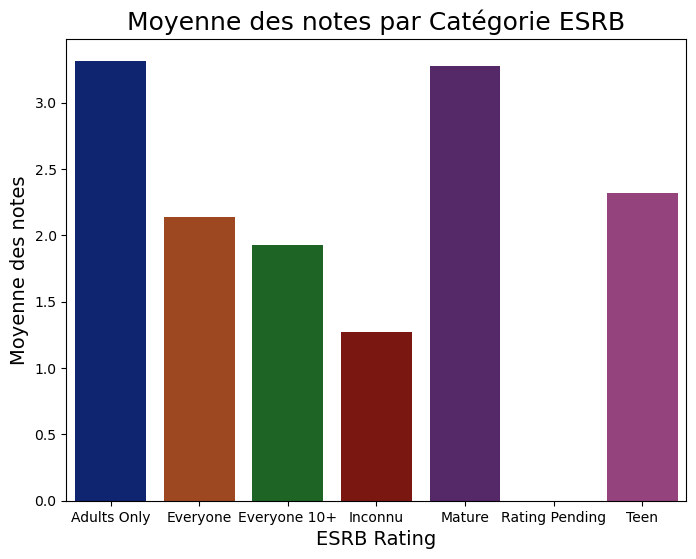

In [175]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Esrb_rating', y='Moyenne des notes', data=moyenne_notes_par_esrb, palette='dark')
plt.title("Moyenne des notes par Catégorie ESRB", fontsize =18)
plt.xlabel("ESRB Rating",fontsize =14)
plt.ylabel("Moyenne des notes",fontsize =14)
plt.show()

 **=>  Sous réserve de prendre en compte le nombre important d'inconnu dans nos notes moyennes, les notes moyennes les plus hautes sont attribuées aux jeux appartenant à la catégorie ESRB 'Adults Only' suivi de 'Mature'.**

<a class="anchor" id="impact_note"></a>
<div style="display: flex; background-color: purple;" >
<h4 style="margin: auto; padding: 15px; color:white; "> Impact des notes moyennes sur les ventes </h4>
</div>

In [178]:
df_filtre_impact_note = fichier_final[['Nom du jeu','Note moyenne','Nombre de note', 'Vente mondiale']]
df_filtre_impact_note.head()

Nom du jeu  Note moyenne  Nombre de note  Vente mondiale
0                Wii Sports      4.190000       174.00000          812969
1         Super Mario Bros.      1.431897        63.98757          409073
2            Mario Kart Wii      4.260000       204.00000          348758
3         Wii Sports Resort      4.170000        89.00000            3302
4  Pokemon Red/Pokemon Blue      1.431897        63.98757           31139

In [179]:
# Suppression des lignes où la valeur de 'Nombre de note' est égale à 0
df_filtre_impact_note = df_filtre_impact_note[df_filtre_impact_note['Nombre de note'] != 0]
df_filtre_impact_note

Nom du jeu  Note moyenne  \
0                                             Wii Sports      4.190000   
1                                      Super Mario Bros.      1.431897   
2                                         Mario Kart Wii      4.260000   
3                                      Wii Sports Resort      4.170000   
4                               Pokemon Red/Pokemon Blue      1.431897   
...                                                  ...           ...   
11454                 Ishin no Arashi: Shippuu Ryuumeden      1.431897   
11456                         Patrician IV: Gold Edition      1.431897   
11457                                            15 Days      0.000000   
11458  The Treasures of Mystery Island 3 Pack - Save ...      1.431897   
11459                                     Carmageddon 64      1.431897   

       Nombre de note  Vente mondiale  
0           174.00000          812969  
1            63.98757          409073  
2           204.00000          348758  
3            89.00000            3302  
4            63.98757           31139  
...               ...             ...  
11454        63.98757              96  
11456        63.98757              96  
11457         2.00000              96  
11458        63.98757              96  
11459        63.98757              96  

[9789 rows x 4 columns]

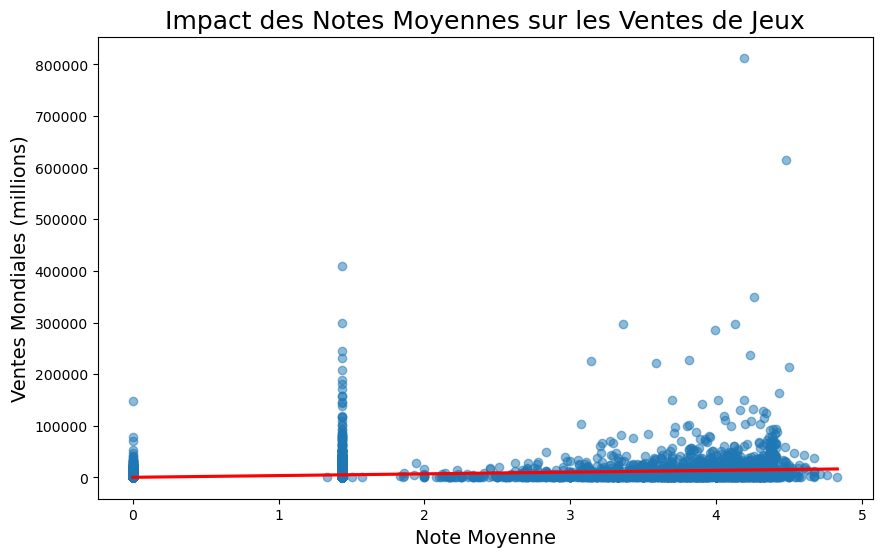

In [180]:
# visualisation
plt.figure(figsize=(10, 6))
sns.regplot(data=df_filtre_impact_note, x="Note moyenne", y="Vente mondiale", scatter_kws={"alpha": 0.5}, line_kws={"color": "red"})

plt.title("Impact des Notes Moyennes sur les Ventes de Jeux", fontsize =18)
plt.xlabel("Note Moyenne", fontsize =14 )
plt.ylabel("Ventes Mondiales (millions)", fontsize =14)
plt.show()

**La pente de la droite de régression est presque plate, cela signifie que la note n’influence pas forcément les ventes.**

/var/folders/33/vzq1dtn92x30kxs762l39sdm0000gn/T/ipykernel_60775/2678232257.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




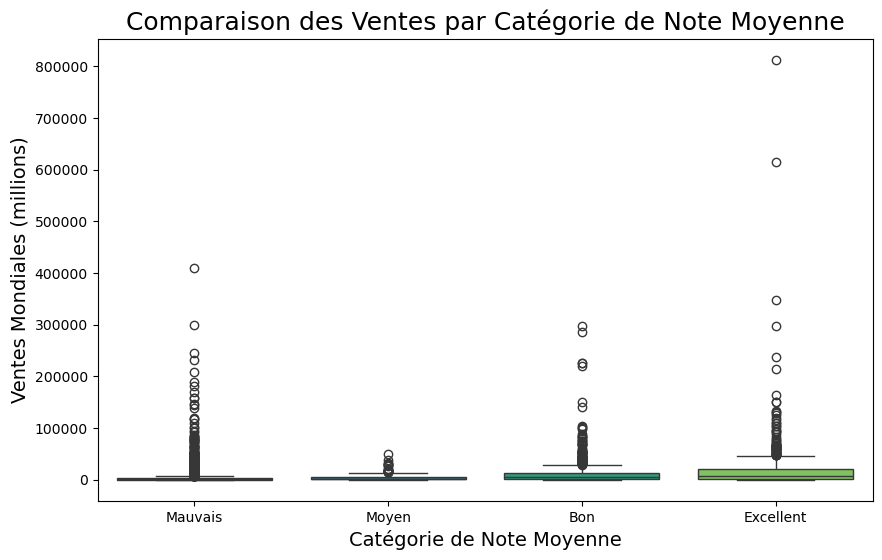

In [182]:
# Catégorisation des notes en tranches
df_filtre_impact_note["Categorie_Note"] = pd.cut(df_filtre_impact_note["Note moyenne"], bins=[0, 2, 3, 4, 5], labels=["Mauvais", "Moyen", "Bon", "Excellent"])

# Boxplot pour voir la répartition des ventes par catégorie de notes
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_filtre_impact_note, x="Categorie_Note", y="Vente mondiale", palette="viridis")

plt.title("Comparaison des Ventes par Catégorie de Note Moyenne",fontsize =18 )

plt.xlabel("Catégorie de Note Moyenne", fontsize =14)
plt.ylabel("Ventes Mondiales (millions)", fontsize =14)
plt.show();

<a class="anchor" id="analyse_tempo"></a>
<div style="display: flex; background-color: magenta;" >
<h2 style="margin: auto; padding: 15px; color:white; "> Analyses temporelles </h2>
</div>

<a class="anchor" id="distrib_date_sortie"></a>
<div style="display: flex; background-color: purple;" >
<h3 style="margin: auto; padding: 15px; color:white; "> Distribution des dates de sortie de consoles </h3>
</div>

In [185]:
# Groupement par 'Date de Sortie de la console'' et comptage des consoles uniques
nombre_consoles_uniques = vente_consoles.groupby('Date de Sortie')['Platform'].nunique().reset_index()
nombre_consoles_uniques

Date de Sortie  Platform
0             1977         1
1             1983         1
2             1988         1
3             1989         1
4             1990         1
5             1994         1
6             1996         1
7             2000         1
8             2001         2
9             2004         2
10            2005         1
11            2006         2
12            2011         1
13            2013         2
14            2017         1
15            2020         1

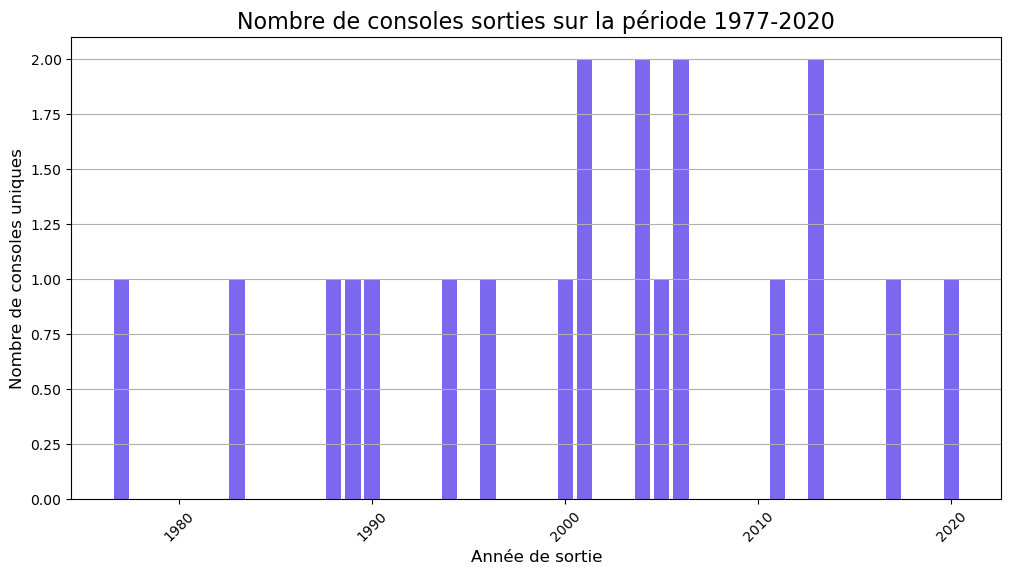

In [186]:
# Visualisation
plt.figure(figsize=(12, 6))
plt.bar(nombre_consoles_uniques['Date de Sortie'], nombre_consoles_uniques['Platform'], color='mediumslateblue')

# Ajout des titres et des labels
plt.title('Nombre de consoles sorties sur la période 1977-2020', fontsize=16)
plt.xlabel('Année de sortie', fontsize=12)
plt.ylabel('Nombre de consoles uniques', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.show();

<a class="anchor" id="histo_vente_consol"></a>
<div style="display: flex; background-color: purple;" >
<h3 style="margin: auto; padding: 15px; color:white; "> Historique des ventes de consoles (1977-2020) </h3>
</div>

In [188]:
vente_consoles

Platform Constructeur  Date de Sortie  Vente (en million)
0      PlayStation 2         Sony            2000            158.0000
1        Nintendo DS     Nintendo            2004            157.1004
2    Nintendo Switch     Nintendo            2017            126.8762
3     Game Boy Color     Nintendo            1989            118.6900
4      PlayStation 4         Sony            2013            115.8300
5        PlayStation         Sony            1994            103.4240
6                Wii     Nintendo            2006             99.5974
7      PlayStation 3         Sony            2006             87.9040
8           Xbox 360    Microsoft            2005             83.2000
9                PSP         Sony            2004             81.9750
10  Game Boy Advance     Nintendo            2001             78.2496
11      Nintendo 3DS     Nintendo            2011             75.9400
12               NES     Nintendo            1983             60.6718
13          Xbox One    Microsoft            2013             59.7400
14    Super Nintendo     Nintendo            1990             47.1360
15     PlayStation 5         Sony            2020             43.3680
16       Nintendo 64     Nintendo            1996             31.6128
17        Mega Drive         Sega            1988             31.0575
18        Atari 2600        Atari            1977             30.6000
19              Xbox    Microsoft            2001             24.0000

In [189]:
ventes_annee_constructeur = vente_consoles.groupby(['Date de Sortie', 'Constructeur'])['Vente (en million)'].sum().reset_index()
ventes_annee_constructeur.head()

Date de Sortie Constructeur  Vente (en million)
0            1977        Atari             30.6000
1            1983     Nintendo             60.6718
2            1988         Sega             31.0575
3            1989     Nintendo            118.6900
4            1990     Nintendo             47.1360

In [190]:
# Ajout d'une colonne de cumul par constructeur
ventes_annee_constructeur['Ventes_Cumulees'] = ventes_annee_constructeur.groupby('Constructeur')['Vente (en million)'].cumsum()
ventes_annee_constructeur

Date de Sortie Constructeur  Vente (en million)  Ventes_Cumulees
0             1977        Atari             30.6000          30.6000
1             1983     Nintendo             60.6718          60.6718
2             1988         Sega             31.0575          31.0575
3             1989     Nintendo            118.6900         179.3618
4             1990     Nintendo             47.1360         226.4978
5             1994         Sony            103.4240         103.4240
6             1996     Nintendo             31.6128         258.1106
7             2000         Sony            158.0000         261.4240
8             2001    Microsoft             24.0000          24.0000
9             2001     Nintendo             78.2496         336.3602
10            2004     Nintendo            157.1004         493.4606
11            2004         Sony             81.9750         343.3990
12            2005    Microsoft             83.2000         107.2000
13            2006     Nintendo             99.5974         593.0580
14            2006         Sony             87.9040         431.3030
15            2011     Nintendo             75.9400         668.9980
16            2013    Microsoft             59.7400         166.9400
17            2013         Sony            115.8300         547.1330
18            2017     Nintendo            126.8762         795.8742
19            2020         Sony             43.3680         590.5010

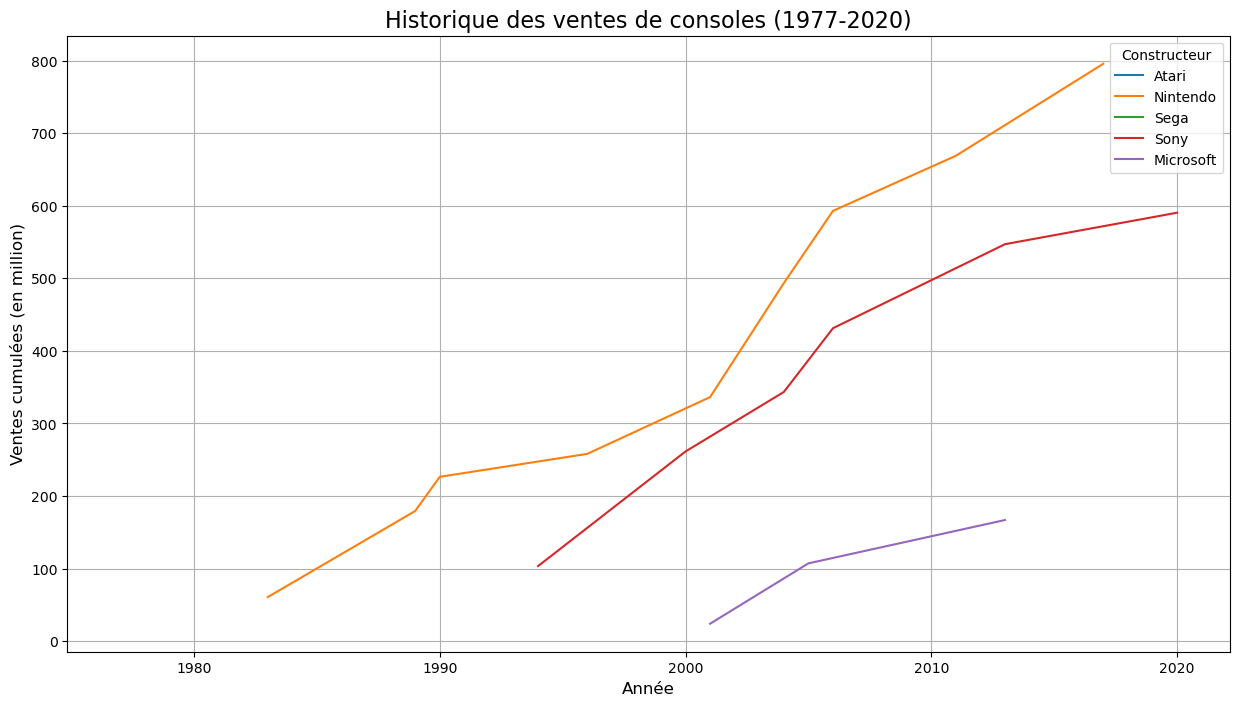

In [191]:
plt.figure(figsize=(15, 8))

# Trace les ventes cumulées par constructeur
sns.lineplot(data=ventes_annee_constructeur, x='Date de Sortie', y='Ventes_Cumulees', hue='Constructeur')

plt.title('Historique des ventes de consoles (1977-2020)', fontsize=16)
plt.xlabel('Année', fontsize=12)
plt.ylabel('Ventes cumulées (en million)', fontsize=12)
plt.legend(title='Constructeur')
plt.grid(True)
plt.show()

<a class="anchor" id="hits_caches"></a>
<div style="display: flex; background-color: magenta;" >
<h2 style="margin: auto; padding: 15px; color:white; "> Analyse des hits cachés </h2>
</div>

**Nous cherchons à identifier les jeux sous estimés (bon score mais vente faibles).**

Condition 1 : Jeux avec des ventes inférieurs ou égal à 300 million d'unités vendues dans le monde

In [195]:
# Jeux avec des ventes inférieurs ou égal à 300 million d'unités vendues dans le monde
jeux_sous_300M = fichier_final[fichier_final['Vente mondiale'] <= 300]
# Calculer le nombre de jeux répondant à ce critère
nombre_jeux_sous_300M = jeux_sous_300M.shape[0]
print(f"Nombre de jeux avec des ventes inférieures à 1 million d'unités : {nombre_jeux_sous_300M}")

Nombre de jeux avec des ventes inférieures à 1 million d'unités : 2601


Condition 2 : Jeux avec des notes supérieurs ou égal à 4.5

In [197]:
# Jeux avec des notes supérieurs ou égal à 4.5
jeux_moy_bonne = fichier_final[(fichier_final['Note moyenne']>=4.5)]  
# Calculer le nombre de jeux répondant à ce critère
nombre_jeux_moy_bonne = jeux_moy_bonne.shape[0]
print(f"Nombre de jeux avec des moyennes de note supérieures à 4.5 : {nombre_jeux_moy_bonne}")

Nombre de jeux avec des moyennes de note supérieures à 4.5 : 39


<div style="display: flex; background-color: purple;" >
<h4 style="margin: auto; padding: 15px; color:white; "> Cumul des deux conditions : Jeux avec des ventes ≤ 300M ET une note moyenne ≥ 4.5 </h4>
</div>

In [199]:
# Jeux avec des ventes ≤ 300M ET une note moyenne ≥ 4.5
jeux_sous_300M_bonne_note = fichier_final[(fichier_final['Vente mondiale'] <= 300) & (fichier_final['Note moyenne'] >= 4.5)]

# Calculer le nombre de jeux répondant à ces critères
nombre_jeux_sous_300M_bonne_note = jeux_sous_300M_bonne_note.shape[0]

# Afficher le résultat
print(f"Nombre de jeux avec des ventes ≤ 300M et une note moyenne ≥ 4.5 : {nombre_jeux_sous_300M_bonne_note}")

# Afficher un aperçu du DataFrame récapitulatif
jeux_sous_300M_bonne_note.head()

Nombre de jeux avec des ventes ≤ 300M et une note moyenne ≥ 4.5 : 2


Nom du jeu        Console  Date de sortie du jeu  \
2086             Jump Ultimate Stars    Nintendo DS                   2006   
7708  Fatal Frame III: The Tormented  PlayStation 2                   2005   

         Genre               Editeur Constructeur Console portable  \
2086  Fighting              Nintendo     Nintendo              Oui   
7708    Action  Take-Two Interactive         Sony              Non   

      Vente Amérique du Nord  Vente Europe  Vente Japon  Vente autres régions  \
2086                       0             0           74                     0   
7708                     416           309            0                   105   

      Vente mondiale  Note moyenne  Note la plus haute  Nombre de note  \
2086              74          4.67                 5.0             6.0   
7708              83          4.50                 5.0            10.0   

     Développeur Esrb_rating  Date de Sortie de la console  \
2086   Ganbarion     Inconnu                          2004   
7708       Tecmo      Mature                          2000   

      Vente de console (en million)  
2086                       157.1004  
7708                       158.0000

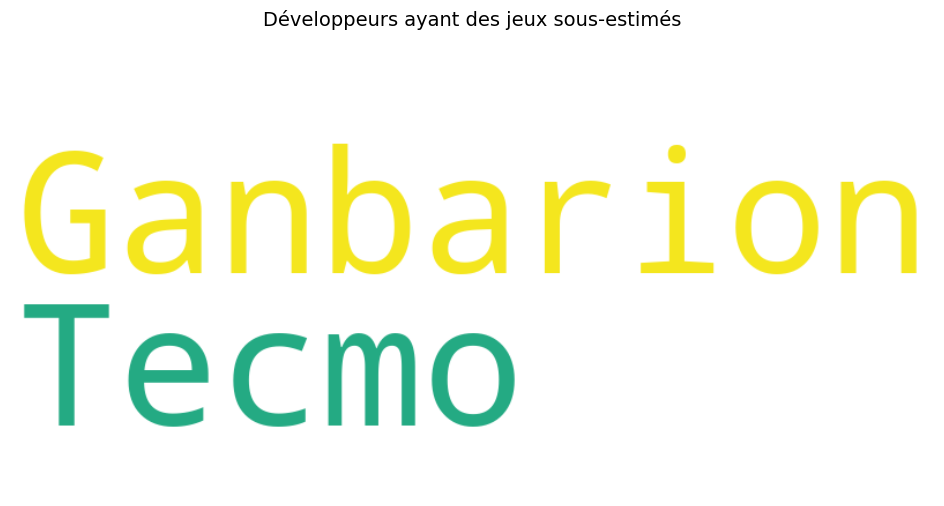

In [200]:
!pip install wordcloud
from wordcloud import WordCloud

# Créer le wordcloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(" ".join(jeux_sous_300M_bonne_note['Développeur'].dropna()))

# Afficher
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation="bilinear",cmap='coolwarm')
plt.axis("off")
plt.title("Développeurs ayant des jeux sous-estimés", fontsize=14)
plt.show();

<a class="anchor" id="comparaison_console_vente_jeu"></a>
<div style="display: flex; background-color: magenta;" >
<h2 style="margin: auto; padding: 15px; color:white; "> Comparaison des ventes de consoles avec les ventes de jeux </h2>
</div>

In [202]:
# Groupement par 'Console' et somme des ventes globales de jeux et consoles
comparaison_des_ventes = fichier_final.groupby('Console').agg({
    'Vente mondiale': 'sum',  # Ventes de jeux
    'Vente de console (en million)': 'first'  # Ventes de consoles
}).reset_index()

# Ajout d'une colonne pour les ventes de consoles en millions
comparaison_des_ventes['Vente de consoles'] = comparaison_des_ventes['Vente de console (en million)']

# Suppression de l'ancienne colonne
comparaison_des_ventes = comparaison_des_ventes.drop(columns=['Vente de console (en million)'])

comparaison_des_ventes.head()

Console  Vente mondiale  Vente de consoles
0               3DO             829         111.015199
1        Atari 2600          816857          30.600000
2         Dreamcast          116905         111.015199
3          Game Boy         1891848         111.015199
4  Game Boy Advance         2154156          78.249600

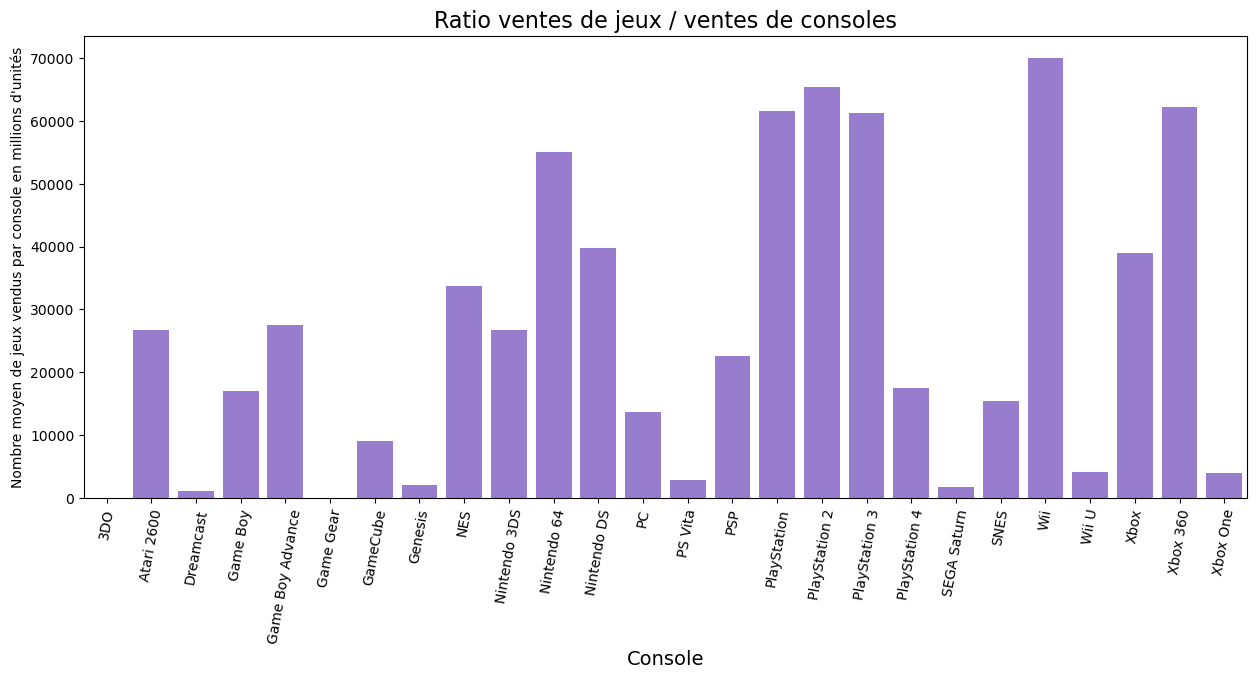

In [203]:
comparaison_des_ventes["Ratio Jeux/Consoles"] = comparaison_des_ventes["Vente mondiale"] / comparaison_des_ventes["Vente de consoles"]

plt.figure(figsize=(15, 6))
sns.barplot(data=comparaison_des_ventes, x="Console", y="Ratio Jeux/Consoles", color="mediumpurple")

plt.title("Ratio ventes de jeux / ventes de consoles",fontsize=16)
plt.xlabel("Console",fontsize=14)
plt.ylabel("Nombre moyen de jeux vendus par console en millions d'unités",fontsize=10)
plt.xticks(rotation=80)

plt.show()

<a class="anchor" id="correlation"></a>
<div style="display: flex; background-color: magenta;" >
<h2 style="margin: auto; padding: 15px; color:white; "> Analyse de corrélation </h2>
</div>

**Dans ce chapitre, nous cherchons à déterminer des correlations entre les variables du dataset c'est-à-dire à identifier si l'une est dépendante de l'autre et à avec quelle force.**

<a class="anchor" id="Matrice_Pearson"></a>
<div style="display: flex; background-color: purple;" >
<h3 style="margin: auto; padding: 15px; color:white; "> Matrice de correlation Pearson </h3>
</div>

In [207]:
fichier_final_quanti = fichier_final[['Date de sortie du jeu','Vente Amérique du Nord','Vente Europe','Vente Japon','Vente autres régions','Vente mondiale','Note moyenne','Nombre de note','Date de Sortie de la console','Vente de console (en million)']]

In [208]:
# fichier final avec variables quantitatives à étudier
fichier_final_quanti.head(3)

Date de sortie du jeu  Vente Amérique du Nord  Vente Europe  Vente Japon  \
0                   2006                    4149        278592        36569   
1                   1985                  299524         34726        66738   
2                   2008                   15216        124936          379   

   Vente autres régions  Vente mondiale  Note moyenne  Nombre de note  \
0                 82908          812969      4.190000       174.00000   
1                  8085          409073      1.431897        63.98757   
2                 33762          348758      4.260000       204.00000   

   Date de Sortie de la console  Vente de console (en million)  
0                          2006                        99.5974  
1                          1983                        60.6718  
2                          2006                        99.5974

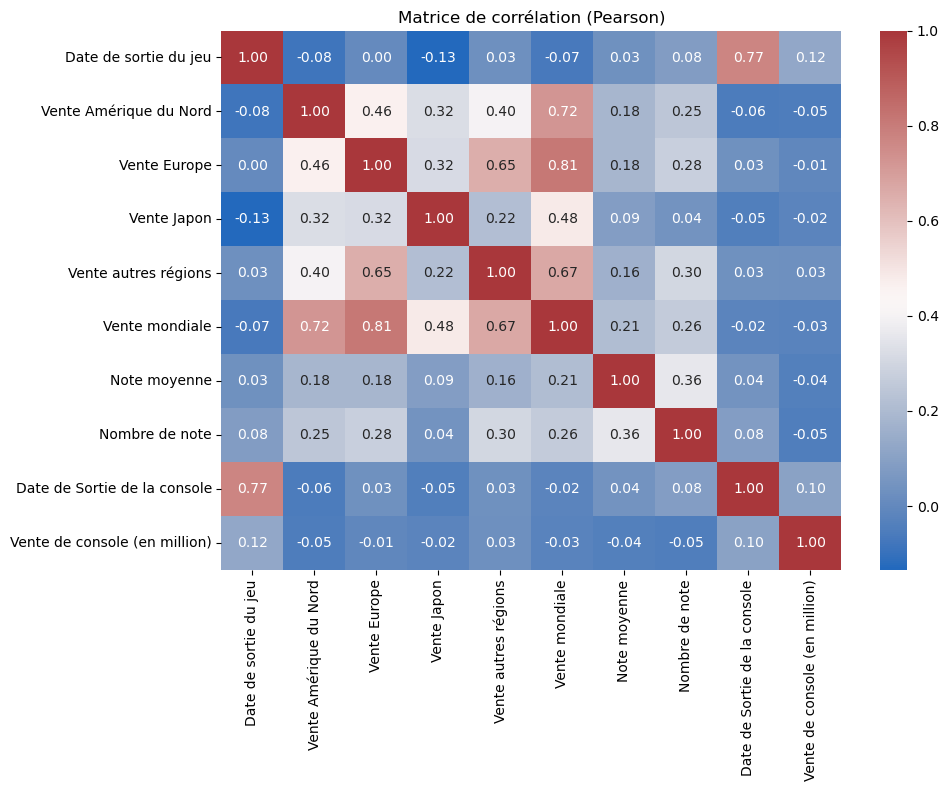

In [350]:
# Calcul de la matrice de correlation Pearson 
matrice_correlation2 = fichier_final_quanti.corr()

# Spearman est basé sur les rangs des données. 
# Tandis que Pearson suppose une relation linéraire et est sensible aux valeurs aberrantes. 
# Pour des variables catégoriques encodées ou des relations non linéaires, Spearman est souvent un meilleur choix.

# Visualisation avec heatmap
plt.figure (figsize =(10,7))
sns.heatmap(matrice_correlation2, annot = True, fmt ='.2f',cmap = 'vlag')
plt.title('Matrice de corrélation (Pearson)')
plt.show()

<a class="anchor" id="Matrice_Spearman"></a>
<div style="display: flex; background-color: purple;" >
<h3 style="margin: auto; padding: 15px; color:white; "> Matrice de correlation Spearman </h3>
</div>

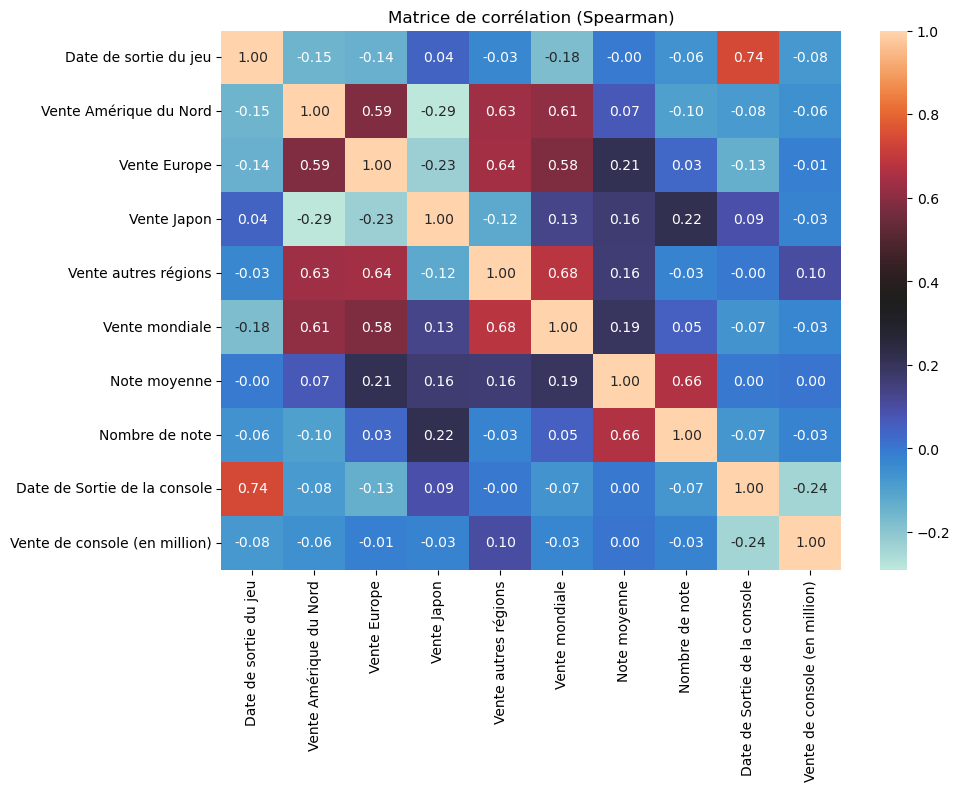

In [211]:
# Calcul de la matrice de correlation Spearman
matrice_correlation = fichier_final_quanti.corr(method='spearman')

# Spearman est basé sur les rangs des données. 
# Tandis que Pearson suppose une relation linéraire et est sensible aux valeurs aberrantes. 
# Pour des variables catégoriques encodées ou des relations non linéaires, Spearman est souvent un meilleur choix.

# Visualisation avec heatmap
plt.figure (figsize =(10,7))
sns.heatmap(matrice_correlation, annot = True, fmt ='.2f',cmap = 'icefire')
plt.title('Matrice de corrélation (Spearman)')
plt.show()

**=> Note :  Spearman est basé sur les rangs des données. 
Tandis que Pearson suppose une relation linéraire et est sensible aux valeurs aberrantes. 
Pour des variables catégoriques encodées ou des relations non linéaires, Spearman est souvent un meilleur choix.**

# __FIN__

[Retour en haut de page - table des matières](#sommaire)